## Showing the Pascal Triangle in LaTeX

In [1]:
from IPython.display import Latex
from math import comb

In [2]:
print('Binomial Coefficient in Equation:')

m = 7

s = r'\begin{equation} '
for n in range(m+1):
    s += r' '
    for k in range(n+1):
        s += r'\binom{' + str(n) + r'}{' + str(k) + r'} '
    s += r' \\ '
s += '\end{equation}'

display(Latex(s))


Binomial Coefficient in Equation:


<IPython.core.display.Latex object>

## Plot using matplotlib :

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from matplotlib.ticker import MaxNLocator
import numpy as np

#mpl.use('svg')

#plt.rcParams['text.usetex'] = True

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

#mpl.rcParams['mathtext.fontset'] = 'cm'
#mpl.rcParams['font.family'] = 'cmu:serif'

#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
#mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
#mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['mathtext.fontset'] = 'dejavuserif' #'Palatino'

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300

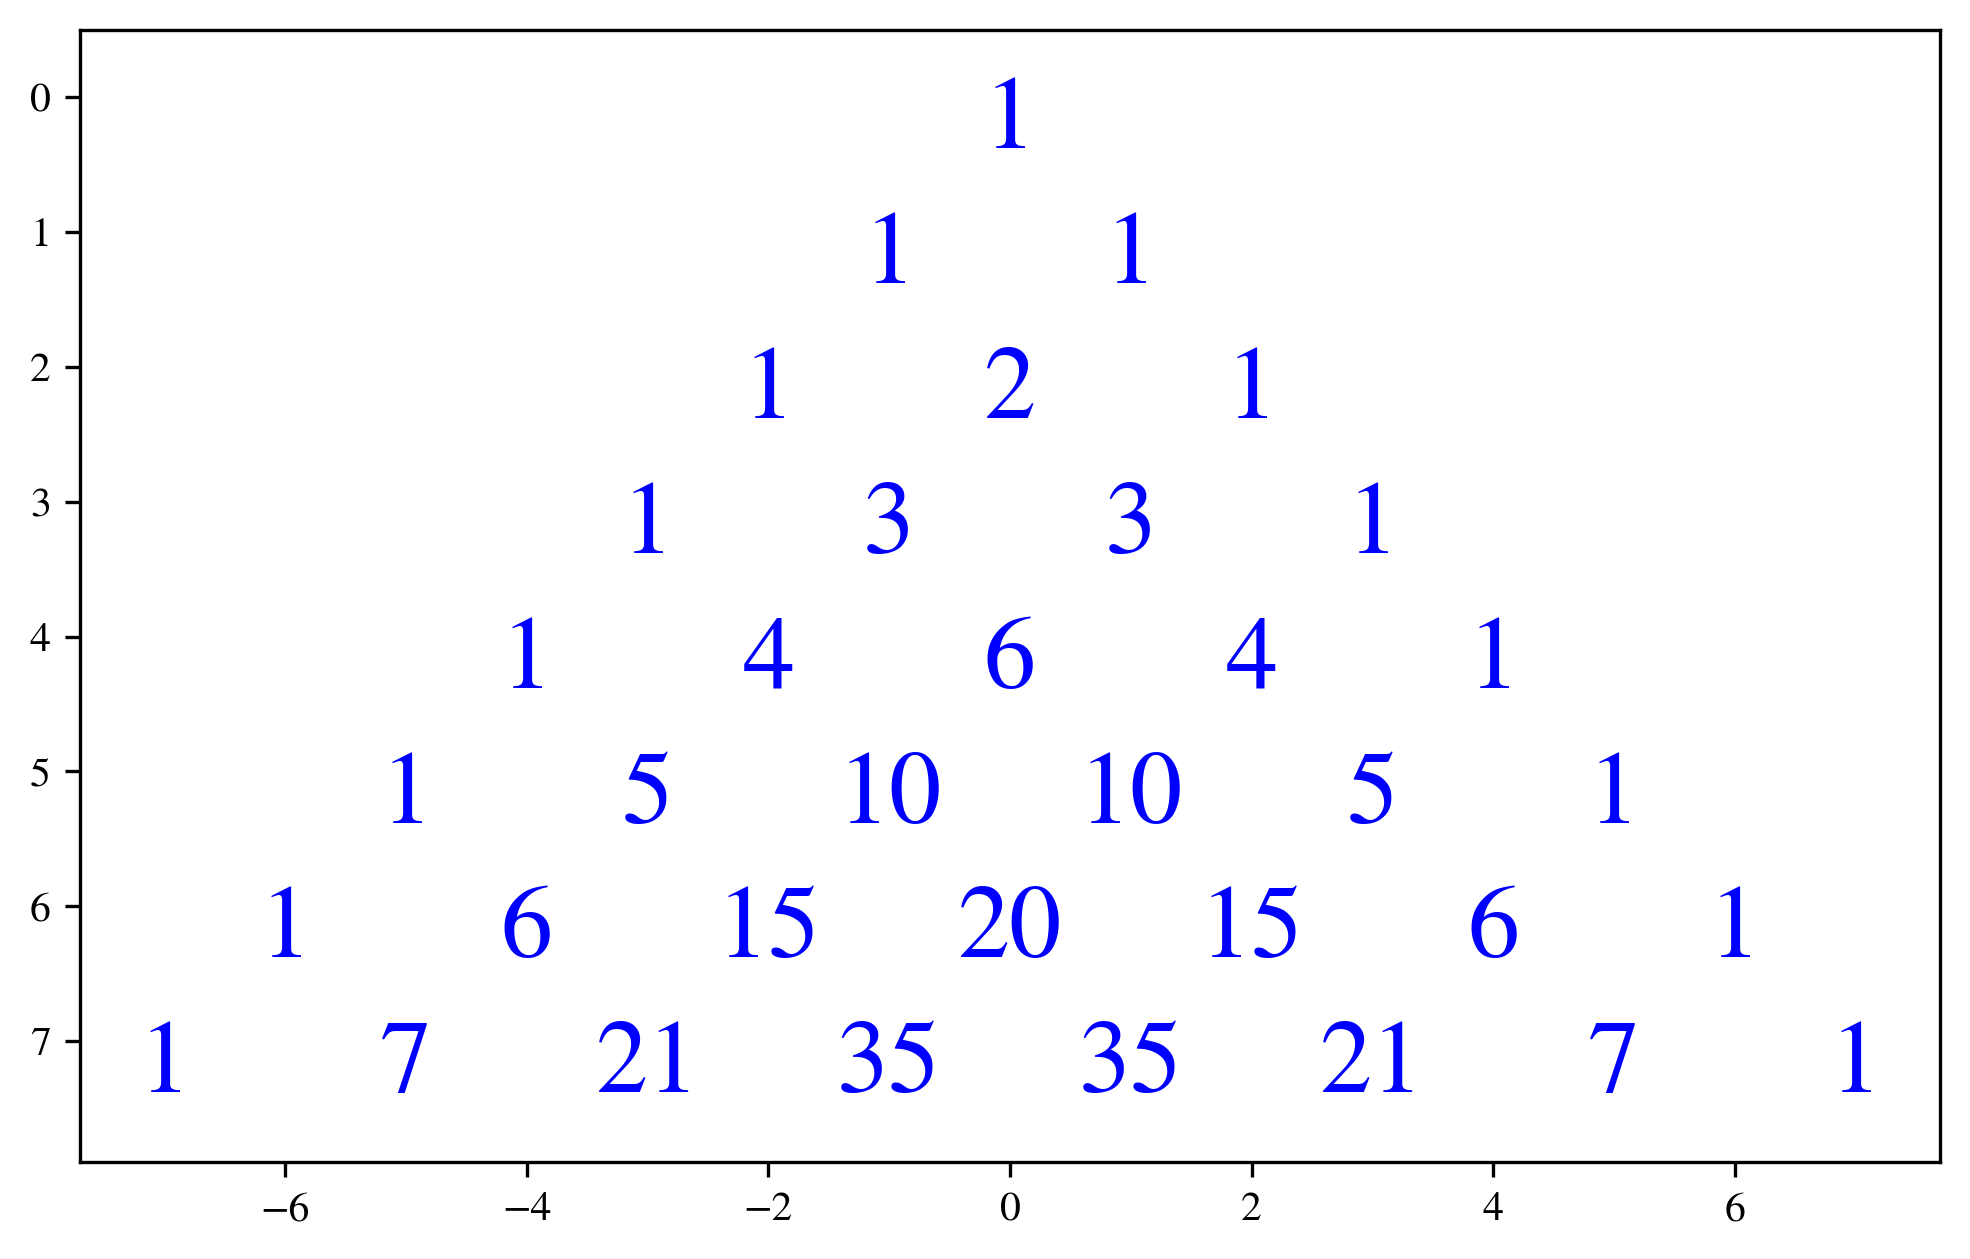

In [4]:
fig, ax = plt.subplots(1, figsize=(8,5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

m = 7

for n in range(m+1):
    for k in range(n+1):
        ax.text(2*k-n, n+0.2, str(comb(n,k)), ha='center', va='center', size=180//m, color='blue' )

ax.set_xlim(-m-0.7, m+0.7)
ax.set_ylim(-0.5, m+0.9)
ax.invert_yaxis()
    
plt.show()

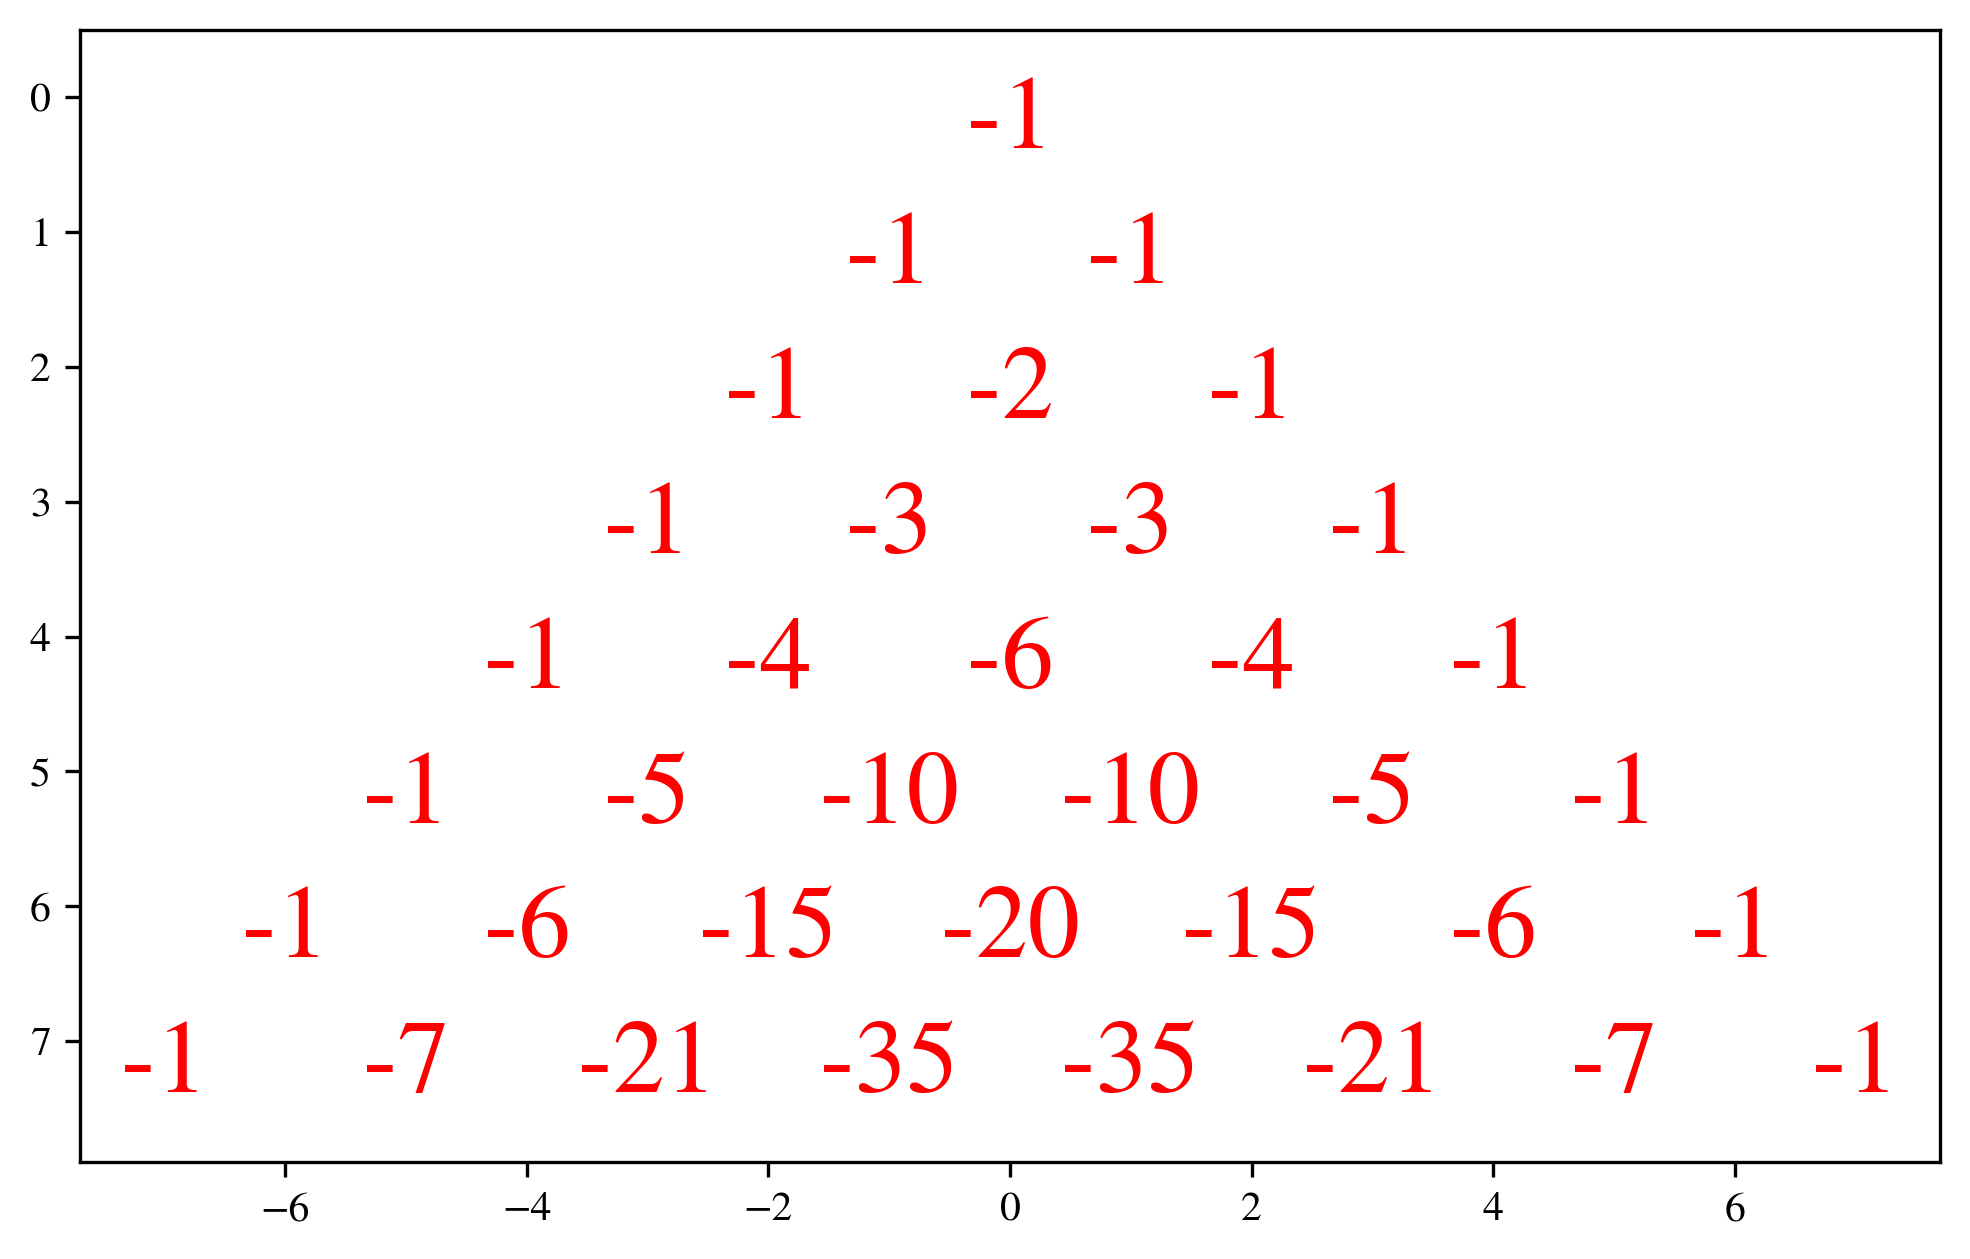

In [5]:
fig, ax = plt.subplots(1, figsize=(8,5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

m = 7

for n in range(m+1):
    for k in range(n+1):
        ax.text(2*k-n, n+0.2, str(-comb(n,k)), ha='center', va='center', size=180//m, color='red' )

ax.set_xlim(-m-0.7, m+0.7)
ax.set_ylim(-0.5, m+0.9)
ax.invert_yaxis()
    
plt.show()

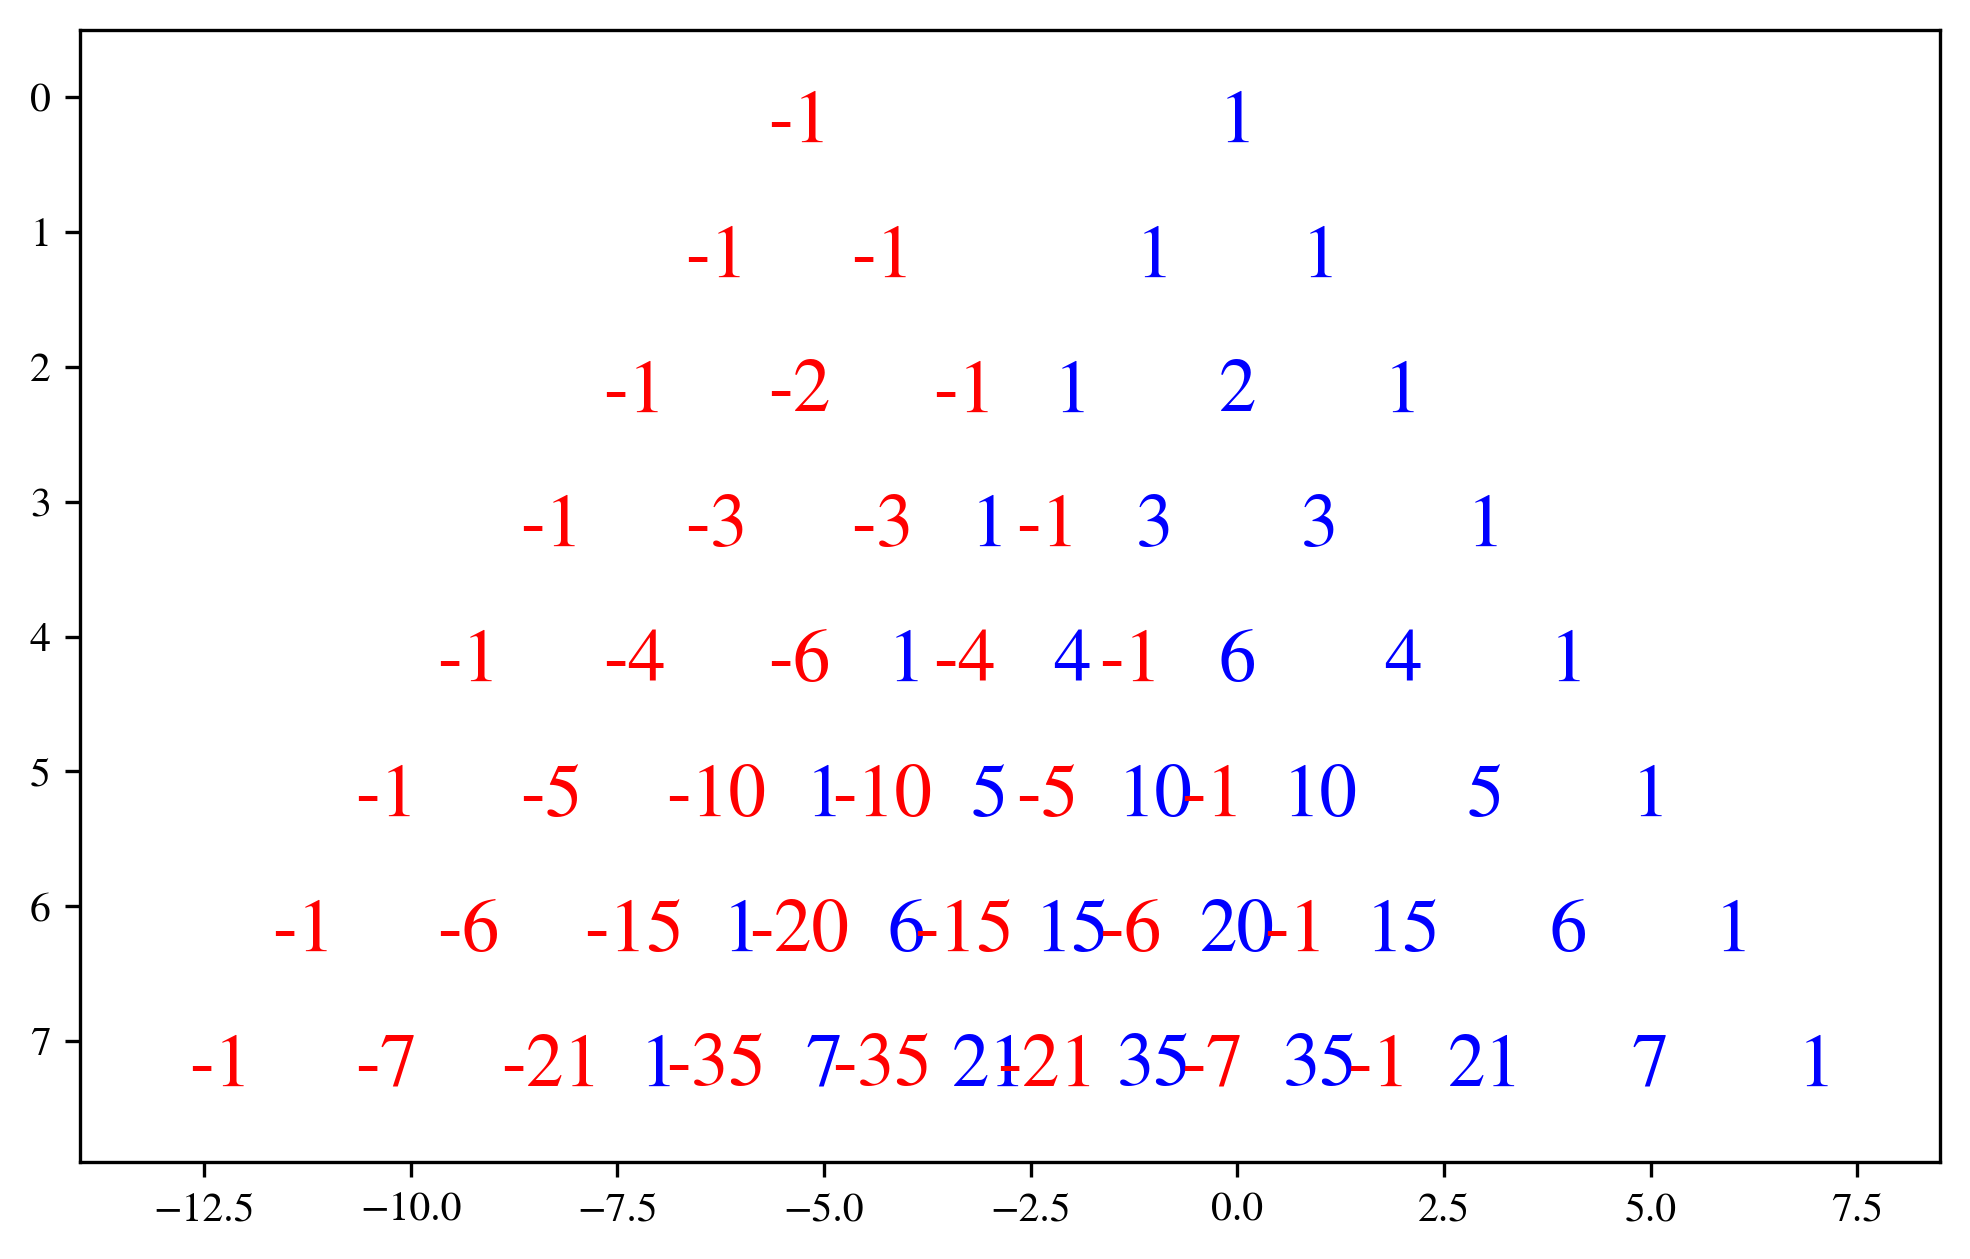

In [6]:
fig, ax = plt.subplots(1, figsize=(8,5))

m = 7

def c(n,k):
    if n < k or k < 0:
        return 0
    else:
        return comb(n, k)

for n in range(m+1):
    for k in range(n+1):
        ax.text(2*k-n, n+0.2, str(c(n,k)), ha='center', va='center', size=130//m, color='blue' )
        ax.text(2*(k-3)-n+0.7, n+0.2, '-' + str(c(n,k)), ha='center', va='center', size=130//m, color='red' )

ax.set_xlim(-m-7.0, m+1.5)
ax.set_ylim(-0.5, m+0.9)
ax.invert_yaxis()
    
plt.show()

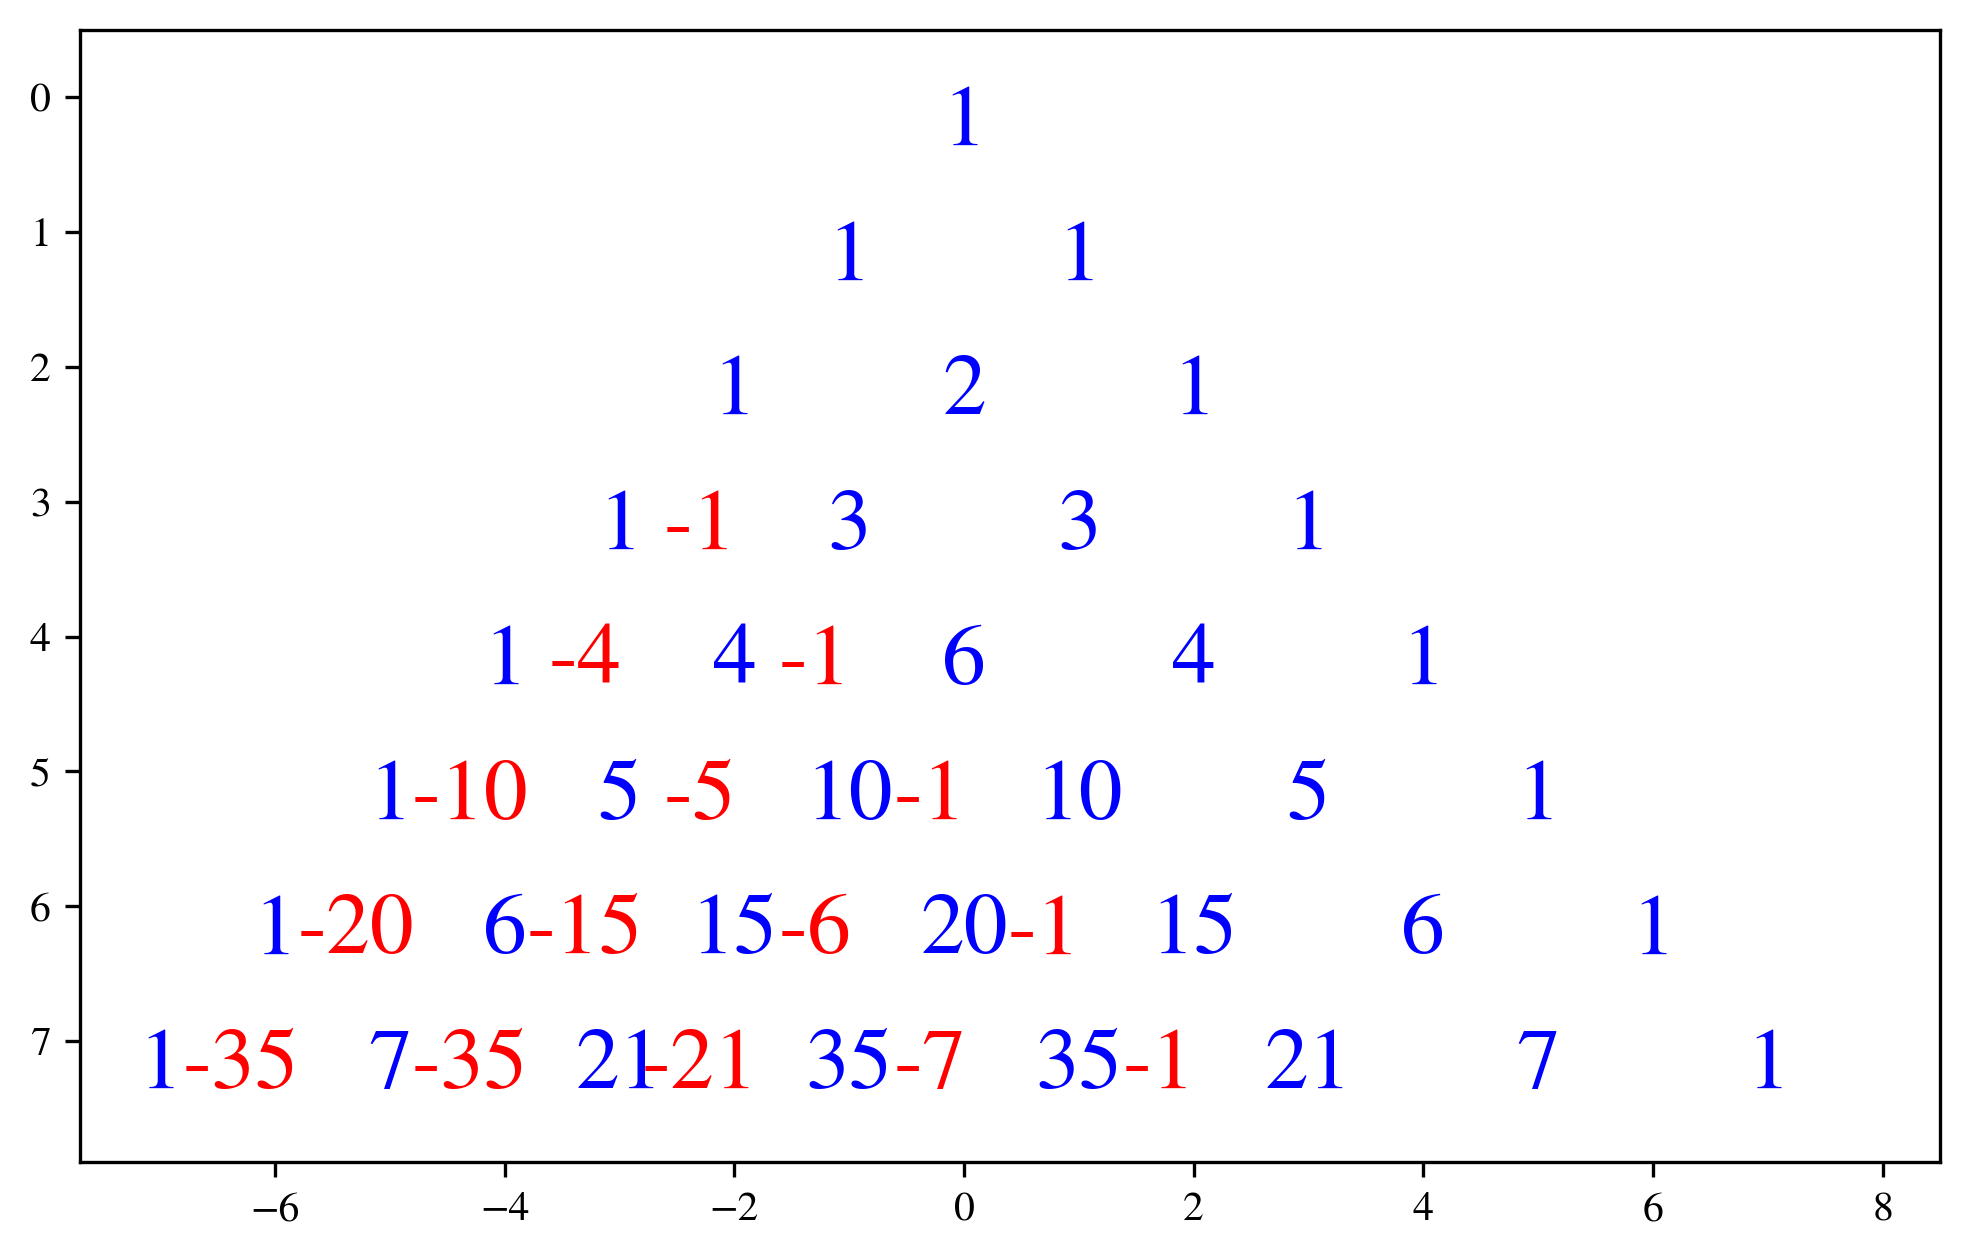

In [7]:
fig, ax = plt.subplots(1, figsize=(8,5))

m = 7

for n in range(m+1):
    for k in range(n+1):
        v1 = c(n,k)
        ax.text(2*k-n, n+0.2, str(v1), ha='center', va='center', size=150//m, color='blue' )
        v2 = c(n,k+3)
        if v2 > 0:
            ax.text(2*k-n+0.7, n+0.2, '-' + str(v2), ha='center', va='center', size=150//m, color='red' )

ax.set_xlim(-m-0.7, m+1.5)
ax.set_ylim(-0.5, m+0.9)
ax.invert_yaxis()
    
plt.show()

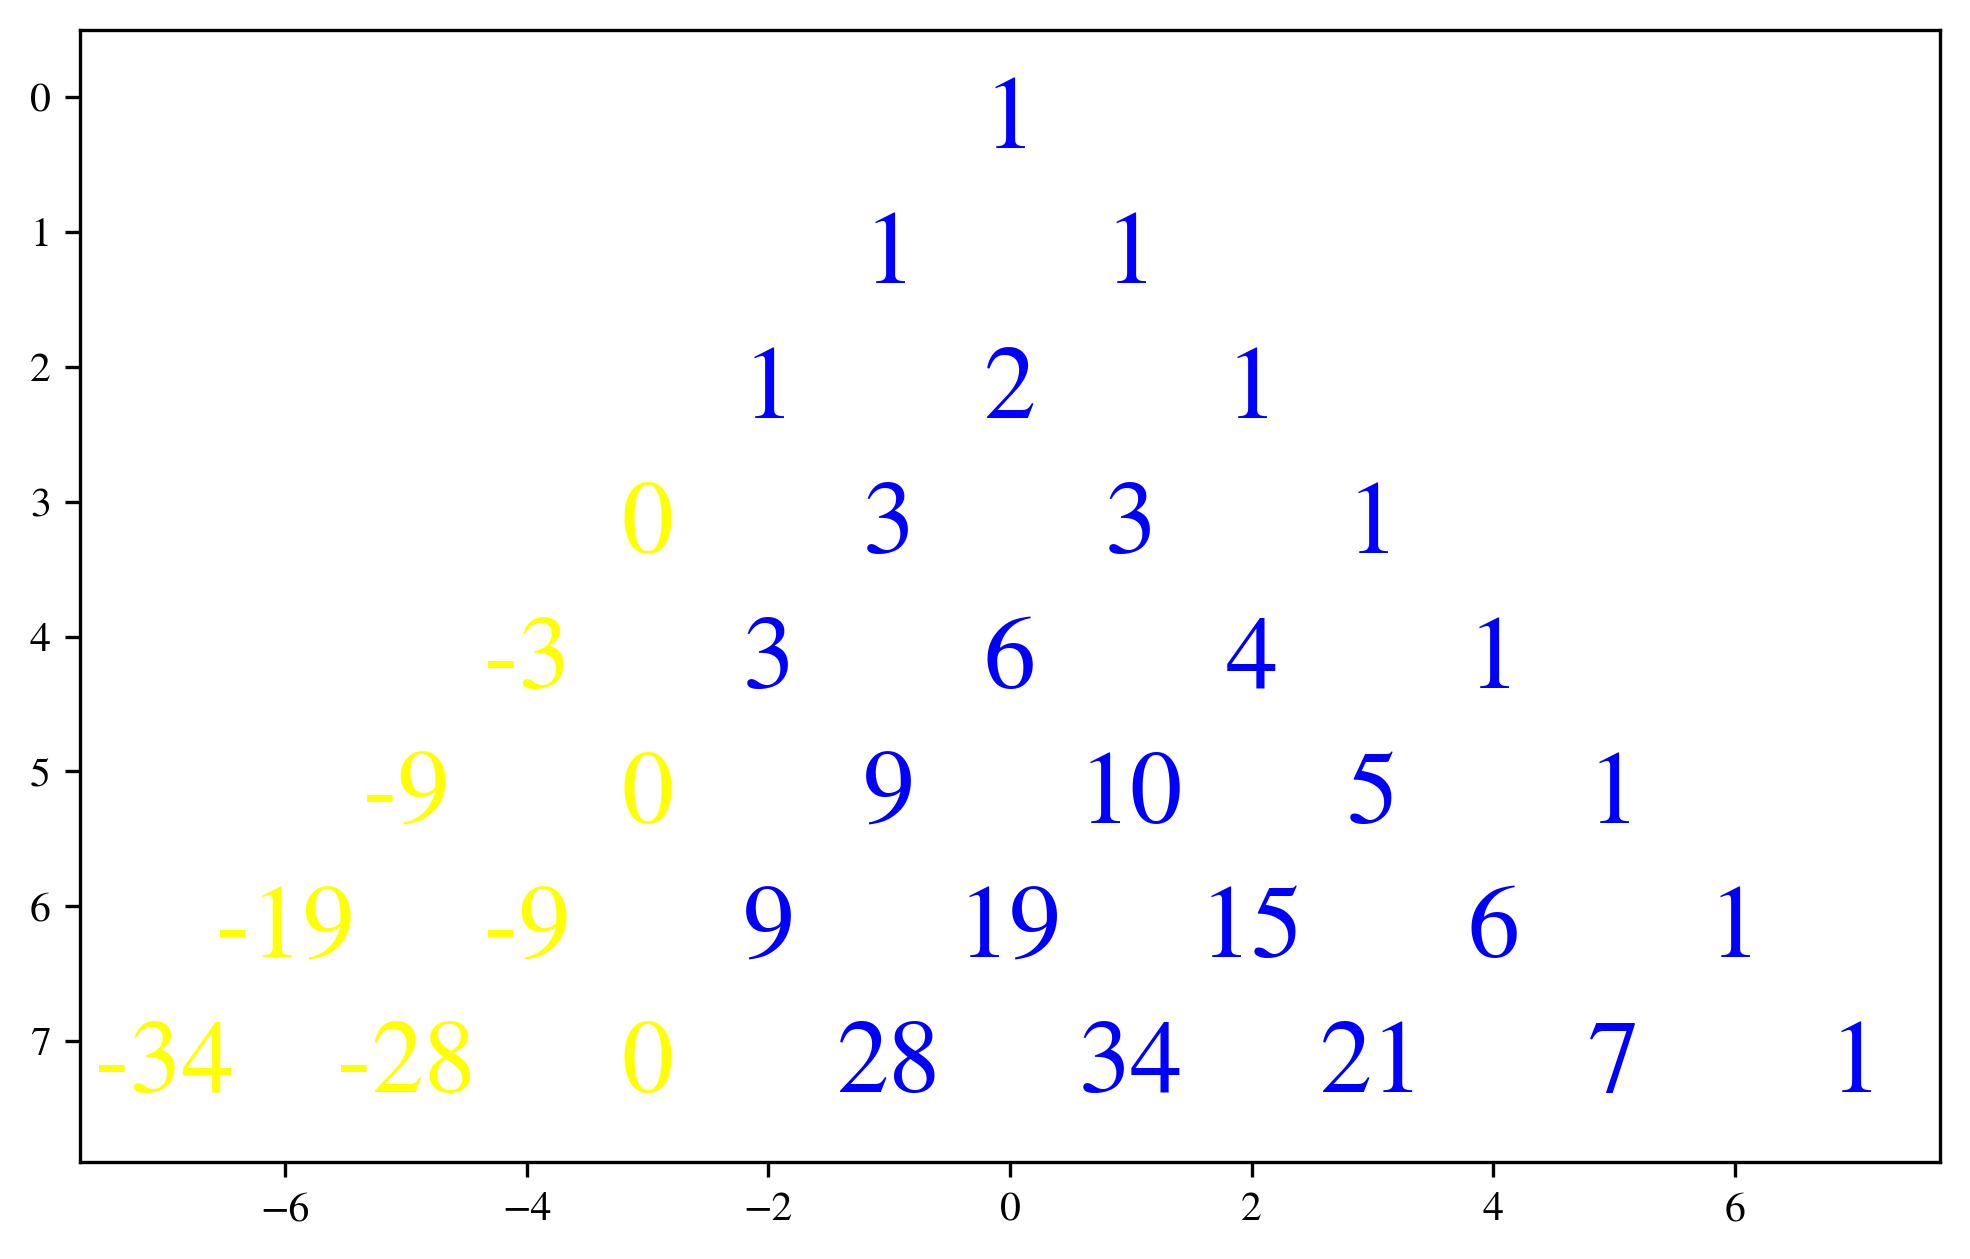

In [8]:
fig, ax = plt.subplots(1, figsize=(8,5))

m = 7

for n in range(m+1):
    for k in range(n+1):
        v = c(n,k)-c(n,k+3)
        ax.text(2*k-n, n+0.2, str(v), ha='center', va='center', size=180//m, color='blue' if v>0 else 'yellow' )

ax.set_xlim(-m-0.7, m+0.7)
ax.set_ylim(-0.5, m+0.9)
ax.invert_yaxis()
    
plt.show()

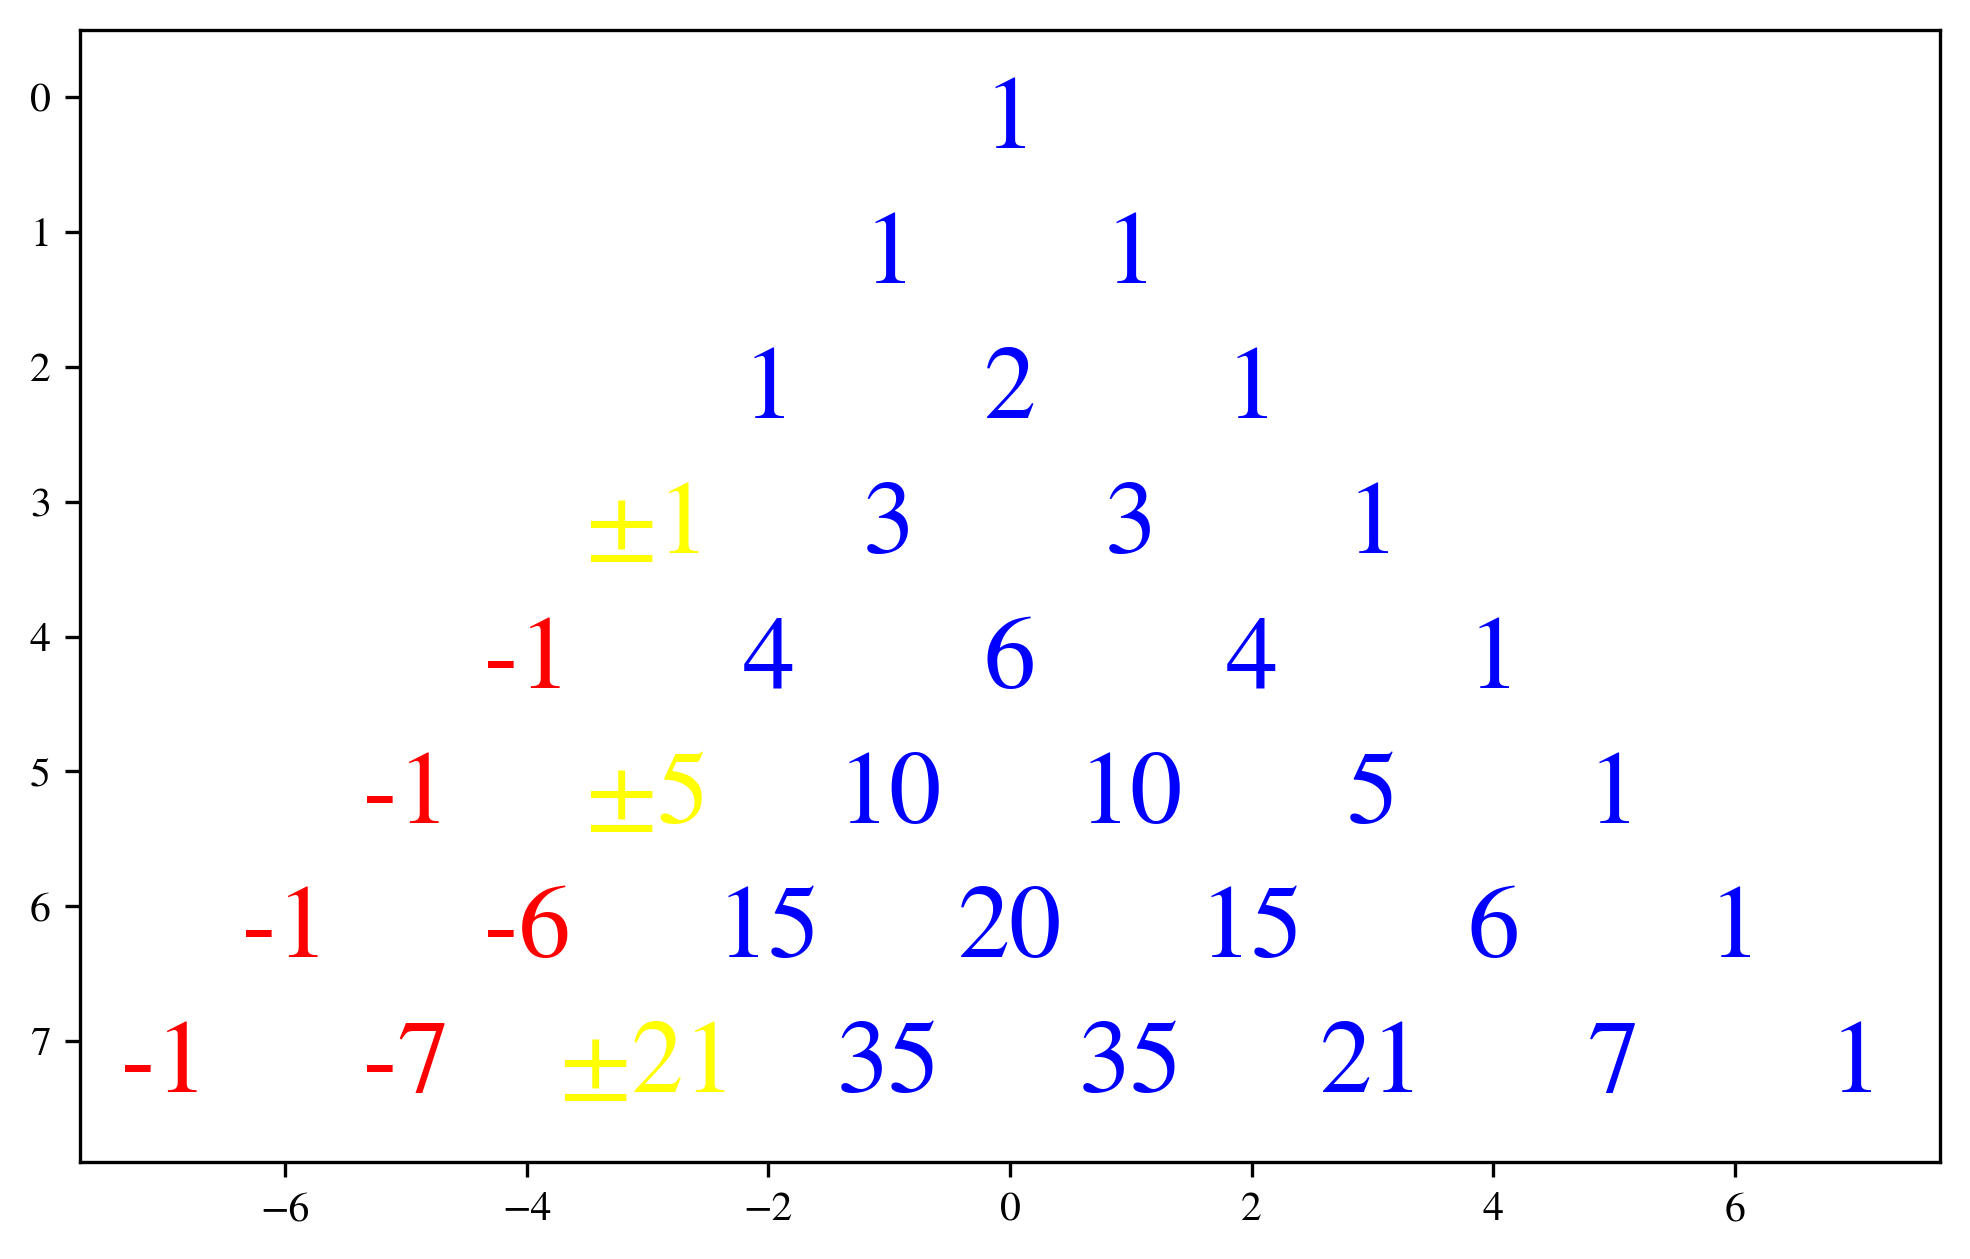

In [9]:
fig, ax = plt.subplots(1, figsize=(8,5))

m = 7

for n in range(m+1):
    for k in range(n+1):
        v = c(n,k)
        color = 'blue' if k>n-k-3 else ('yellow' if k==n-k-3 else 'red')
        s = str(v) if k>n-k-3 else ('±' + str(v) if k==n-k-3 else str(-v))
        ax.text(2*k-n, n+0.2, s, ha='center', va='center', size=180//m, color=color )

ax.set_xlim(-m-0.7, m+0.7)
ax.set_ylim(-0.5, m+0.9)
ax.invert_yaxis()
    
plt.show()

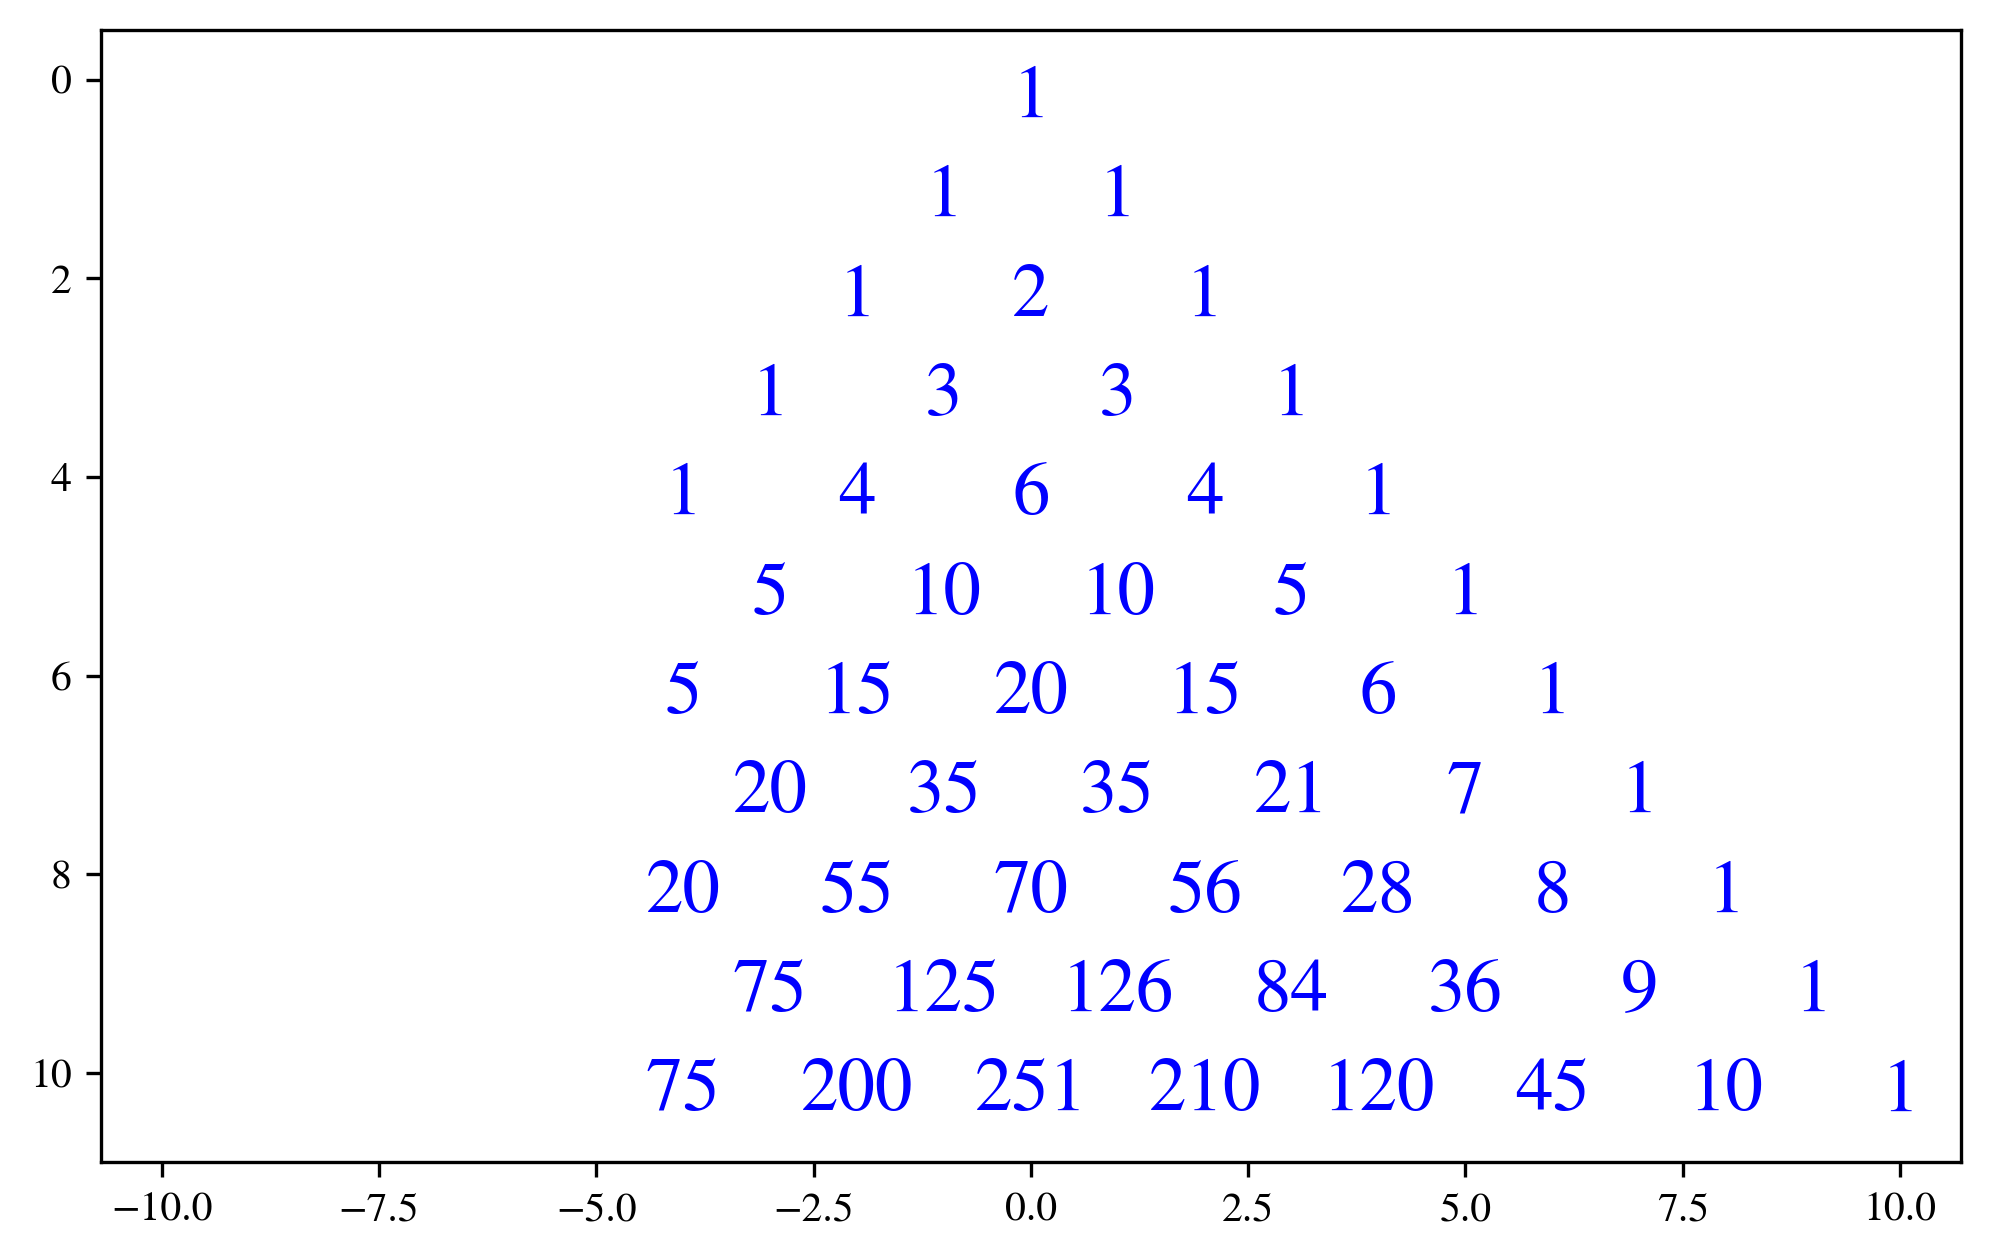

In [10]:
fig, ax = plt.subplots(1, figsize=(8,5))

m = 10

b = 5

for n in range(m+1):
    for k in range(n+1):
        v = c(n,k)-c(n,k+b)
        if v > 0 :
            ax.text(2*k-n, n+0.2, str(v), ha='center', va='center', size=180//m, color='blue')

ax.set_xlim(-m-0.7, m+0.7)
ax.set_ylim(-0.5, m+0.9)
ax.invert_yaxis()
    
plt.show()

In [11]:
# -----------------------------------------------------------
# hexalattice module creates and prints hexagonal lattices
#
# (C) 2020 Alex Kazakov,
# Released under MIT License
# email alex.kazakov@mail.huji.ac.il
# Full documentation: https://github.com/alexkaz2/hexalattice
# -----------------------------------------------------------

import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.transforms import Affine2D
from matplotlib.collections import PatchCollection
from typing import List, Union

def create_hex_triangle(
                    m: int = 5,
                    transpose: bool = False,
                    min_diam: float = 1.0,
                    align_to_origin: bool = True,
                    face_color: Union[List[float], str] = None,
                    edge_color: Union[List[float], str] = None,
                    line_width=1.,
                    plotting_gap: float = 0.,
                    show: bool = False,
                    ax: plt.Axes = None,
                    figsize=None,
                    frame : bool = True) -> (np.ndarray, plt.Axes):

    # Computes the coordinates of the hexagon centers, given the size rotation and layout specifications

    ratio = np.sqrt(3) / 2

    value_k = []
    value_n = []
    coord_x = []
    coord_y = []
    for i in range(m+1):
        for j in range(i+1):
            value_k += [j]
            value_n += [i]
            coord_x += [(j+(m-i)/2)]
            #coord_x += [2*j-i]
            coord_y += [i * ratio]

    value_k = np.array(value_k)
    value_n = np.array(value_n)

    coord_x = np.array(coord_x, dtype='float')
    coord_y = np.array(coord_y, dtype='float')
    
    coord_x = coord_x.reshape(-1, 1)
    coord_y = coord_y.reshape(-1, 1)

    if transpose:
        coord_x, coord_y = coord_y, coord_x
        orientation = np.deg2rad(90.0)
    else:
        orientation = 0.0
    
    origin_x = coord_x[0]  # Pick center of first hexagon as origin for rotation or crop...
    origin_y = coord_y[0]  # np.median() averages center 2 values for even arrays :\
            
    # plot using matplotlib
    if show:

        if ax is None:
            fig = plt.figure(figsize=figsize)
            ax = fig.add_axes([0.05, 0.05, 0.9, 0.9])

        for i, (curr_x, curr_y, curr_n, curr_k) in enumerate(zip(coord_x, coord_y, value_n, value_k)):

            edgecolor = 'black'
            if edge_color is not None  and isinstance(edge_color, list):
                edgecolor = edge_color[i]
            facecolor = (1, 1, 1, 0)  # Make the face transparent
            if face_color is not None  and isinstance(face_color, list):
                facecolor = face_color[i]
            linewidth=1.0
            if line_width is not None and isinstance(line_width, list):
                linewidth = line_width[i]


            if transpose:
                transf = Affine2D().scale(1.0/ratio, 1.0) + ax.transData
            else:
                transf = Affine2D().scale(1.0, 1.0/ratio) + ax.transData
                orientation = np.deg2rad(0)
            
            polygon = mpatches.RegularPolygon((curr_x, curr_y), numVertices=6,
                                              radius=min_diam / np.sqrt(3) * (1 - plotting_gap),
                                              orientation=orientation,
                                              edgecolor=edgecolor, facecolor=facecolor, linewidth=linewidth,
                                              transform=transf)
            ax.add_artist(polygon)

            ax.text(curr_x, curr_y, str(comb(curr_n,curr_k)), ha='center', va='center', size=200/m, transform=transf)

        if transpose:
            ax.set_aspect(1.0/ratio)
        else:
            ax.set_aspect(ratio)
        
        #ax.axis([coord_x.min() - 1.0 * min_diam, coord_x.max() + 1.0 * min_diam, 
        #         coord_y.min() - 1.0 * min_diam, coord_y.max() + 2.5 * min_diam])

        if transpose:
            ax.set_ylabel('$k$')
            ax.set_xlabel('$n$')
            ax.set_ylim(-0.9, m+0.9)
            ax.set_xlim(-0.9, m+0.9)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(True)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(True)
            ax.yaxis.set_ticks_position("right")
            ax.yaxis.set_label_position("right")
        else:
            ax.set_xlabel('$k$')
            ax.set_ylabel('$n$')
            ax.set_xlim(-0.9, m+0.9)
            ax.set_ylim(-0.9, m+0.9)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(True)
            ax.spines['left'].set_visible(True)
            ax.spines['right'].set_visible(False)
            ax.invert_yaxis()
        
        if not frame:    
            ax.axis('off')

    return np.hstack([coord_x, coord_y]), ax

#####################################


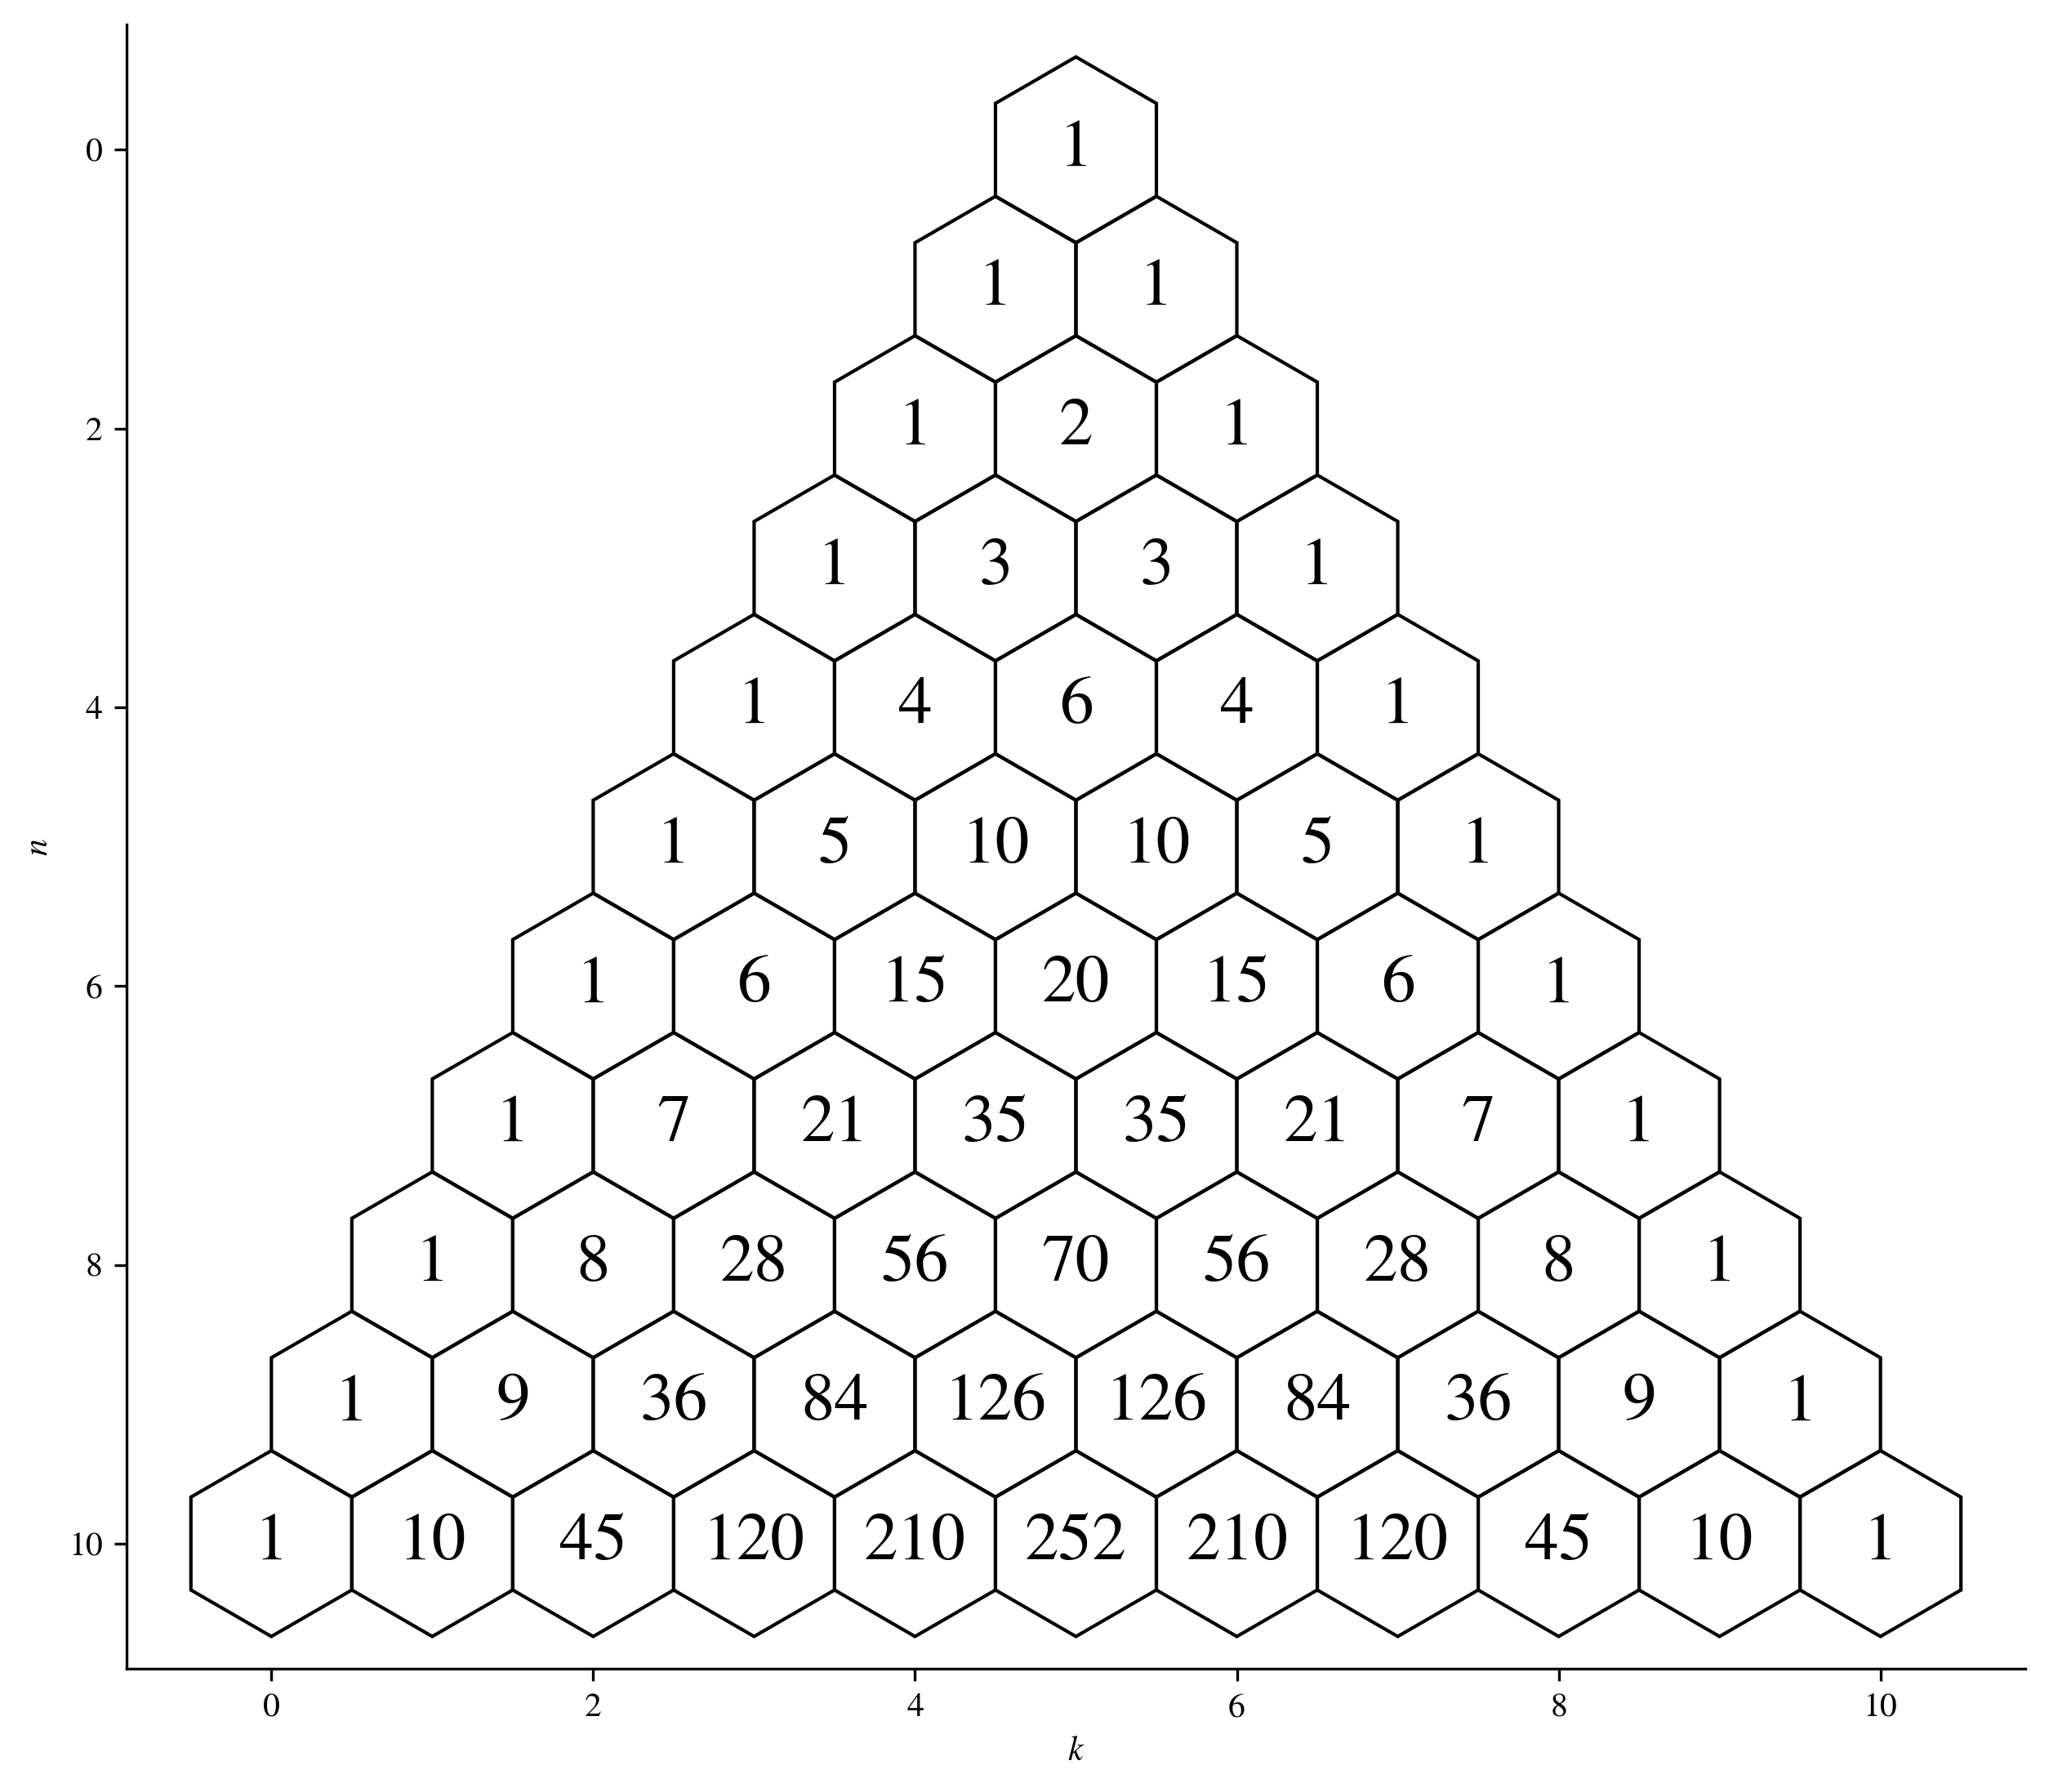

In [12]:
fig, ax = plt.subplots(1, figsize=(10,10))

hex_centers, _ = create_hex_triangle(m=10, show=True, ax=ax)

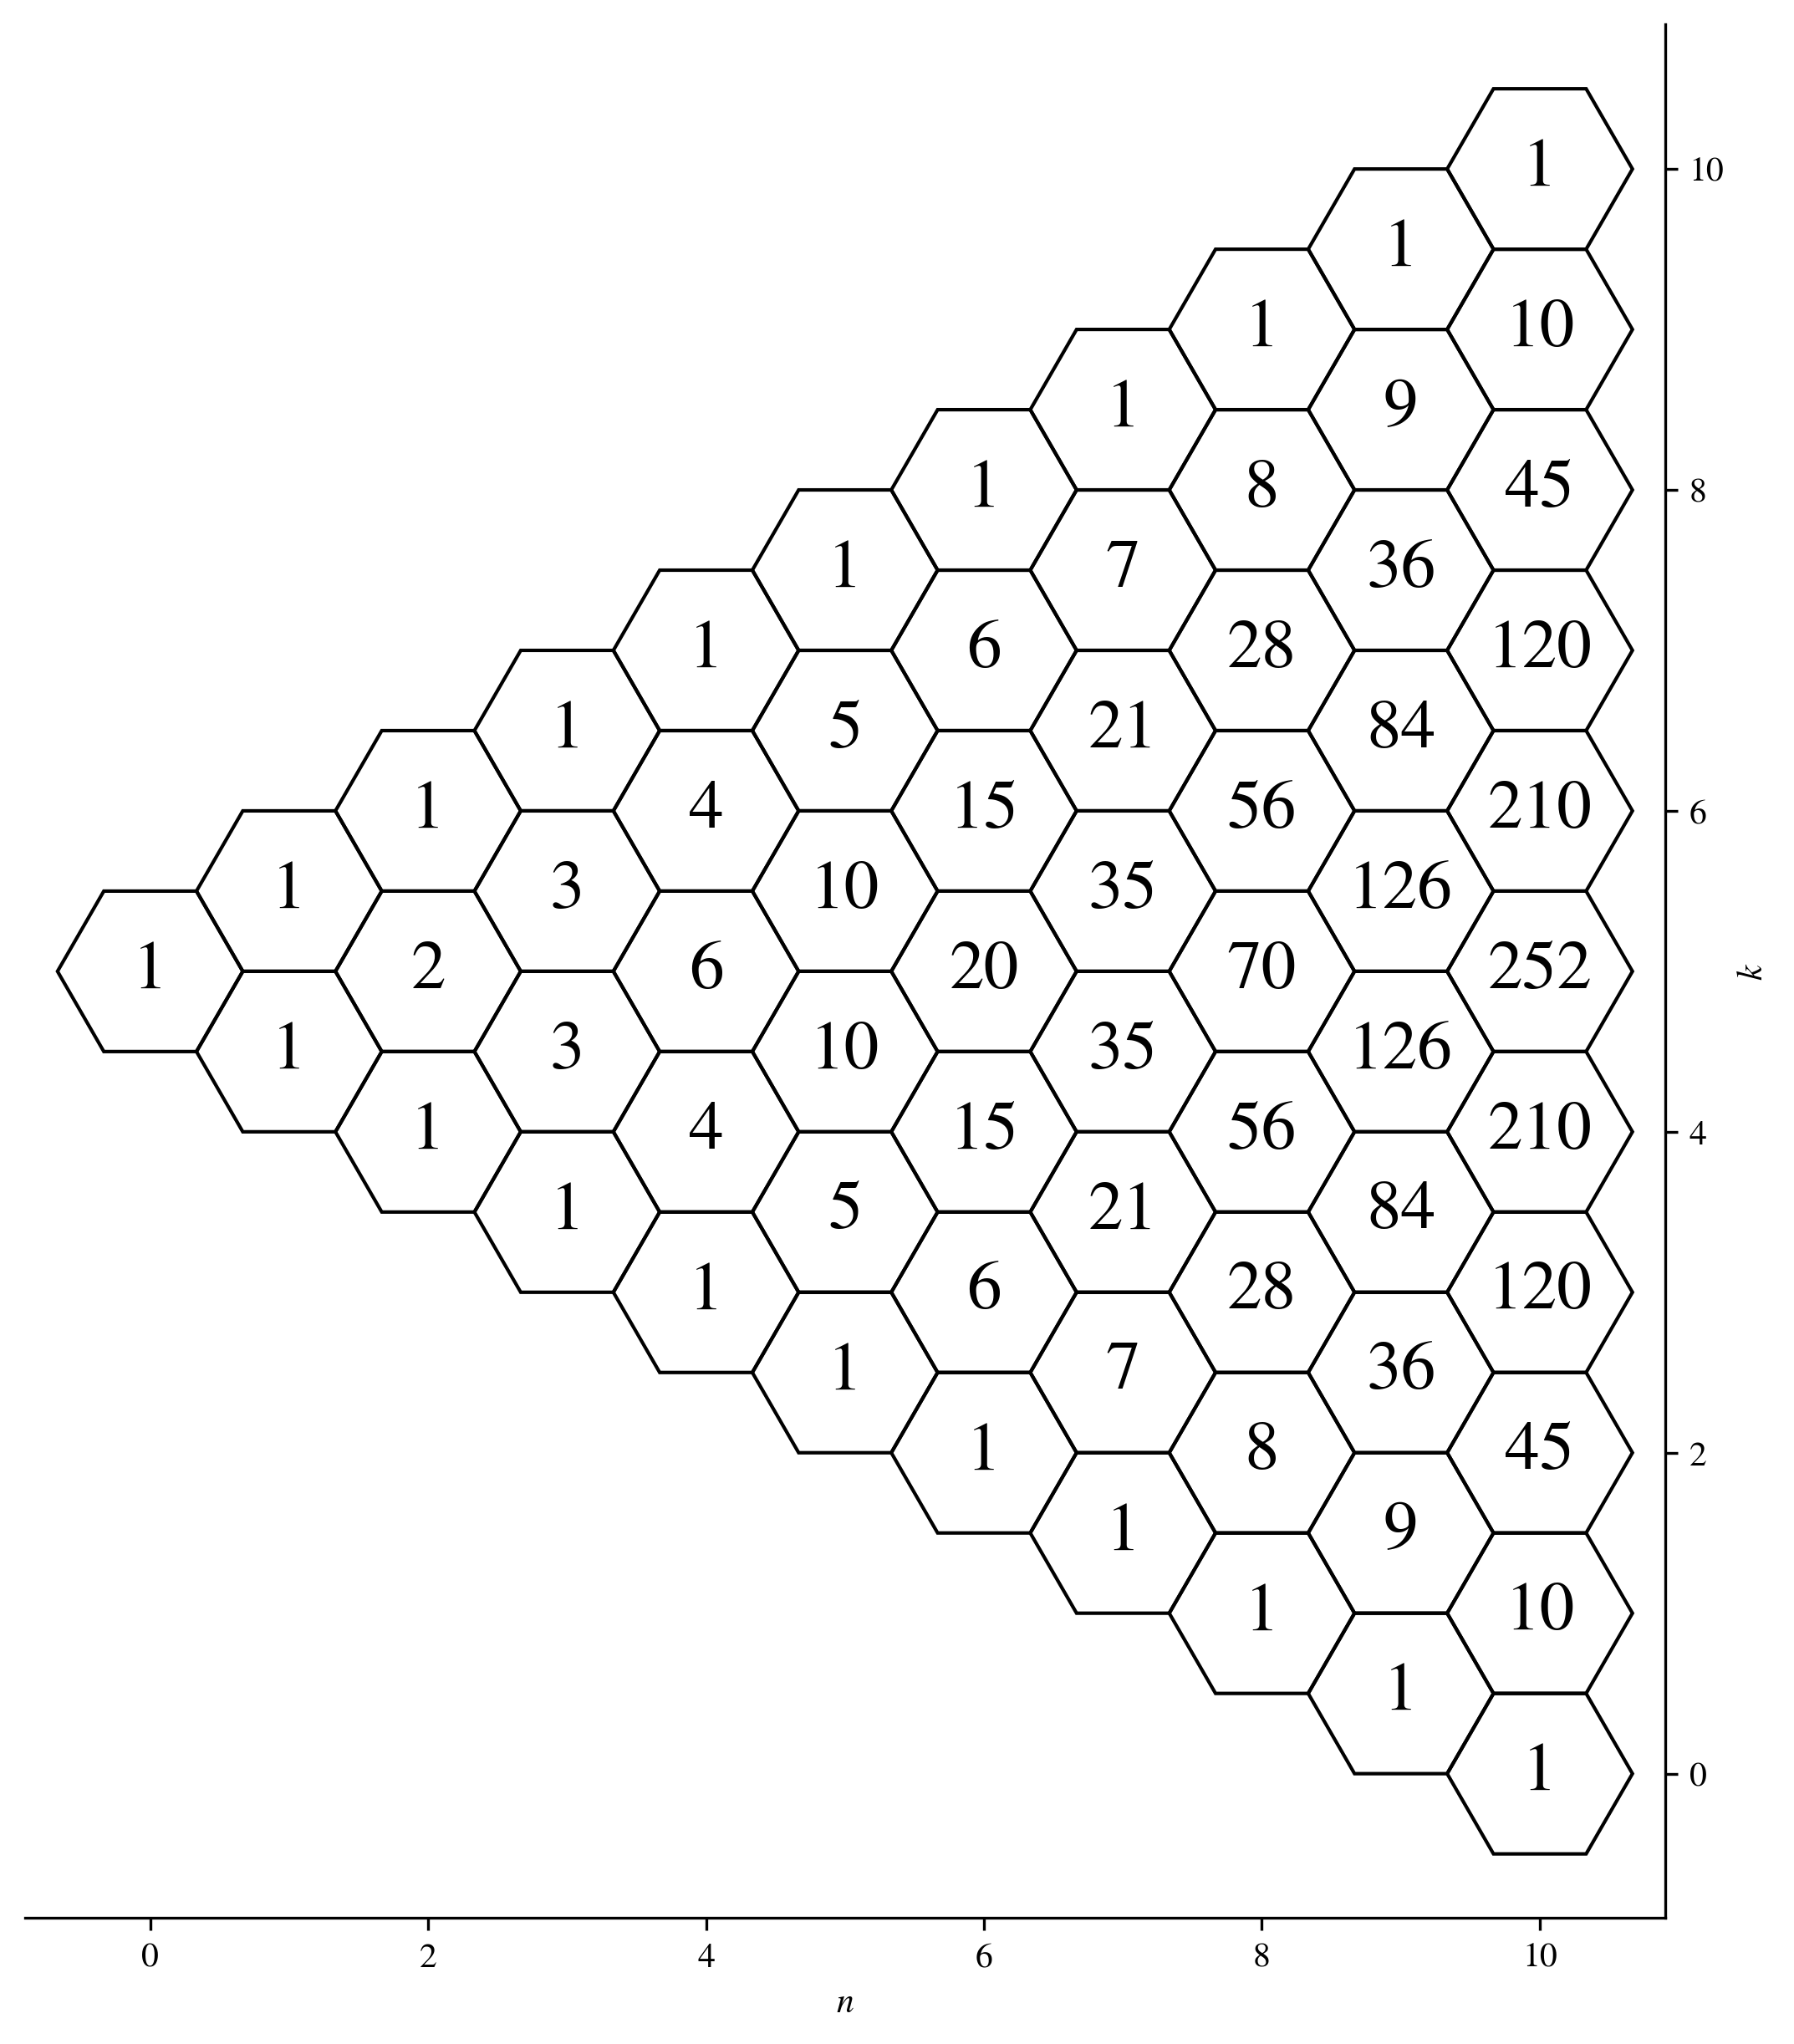

In [13]:
fig, ax = plt.subplots(1, figsize=(10,10))

hex_centers, _ = create_hex_triangle(m=10, show=True, ax=ax, transpose=True)


  1
  1   1
  1   2   1
  1   3   3   1
  1   4   6   4   1
  1   5  10  10   5   1
  1   6  15  20  15   6   1
  1   7  21  35  35  21   7   1
  1   8  28  56  70  56  28   8   1
  1   9  36  84 126 126  84  36   9   1



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 3
 3  3
 3  3  3
 3 67  3  3
 3  3  3  3  3
 3  3  3  3  3  3
 3  3  3  3  3  3  3
 3  3  3  3  3  3  3  3
 3  3  3  3  3  3  3  3  3
 3  3  3  3  3  3  3  3  3  3

x
x x
x x x
x x x x
x x x x x
x x x x x x
x x x x x x x
x x x x x x x x
x x x x x x x x x
x x x x x x x x x x



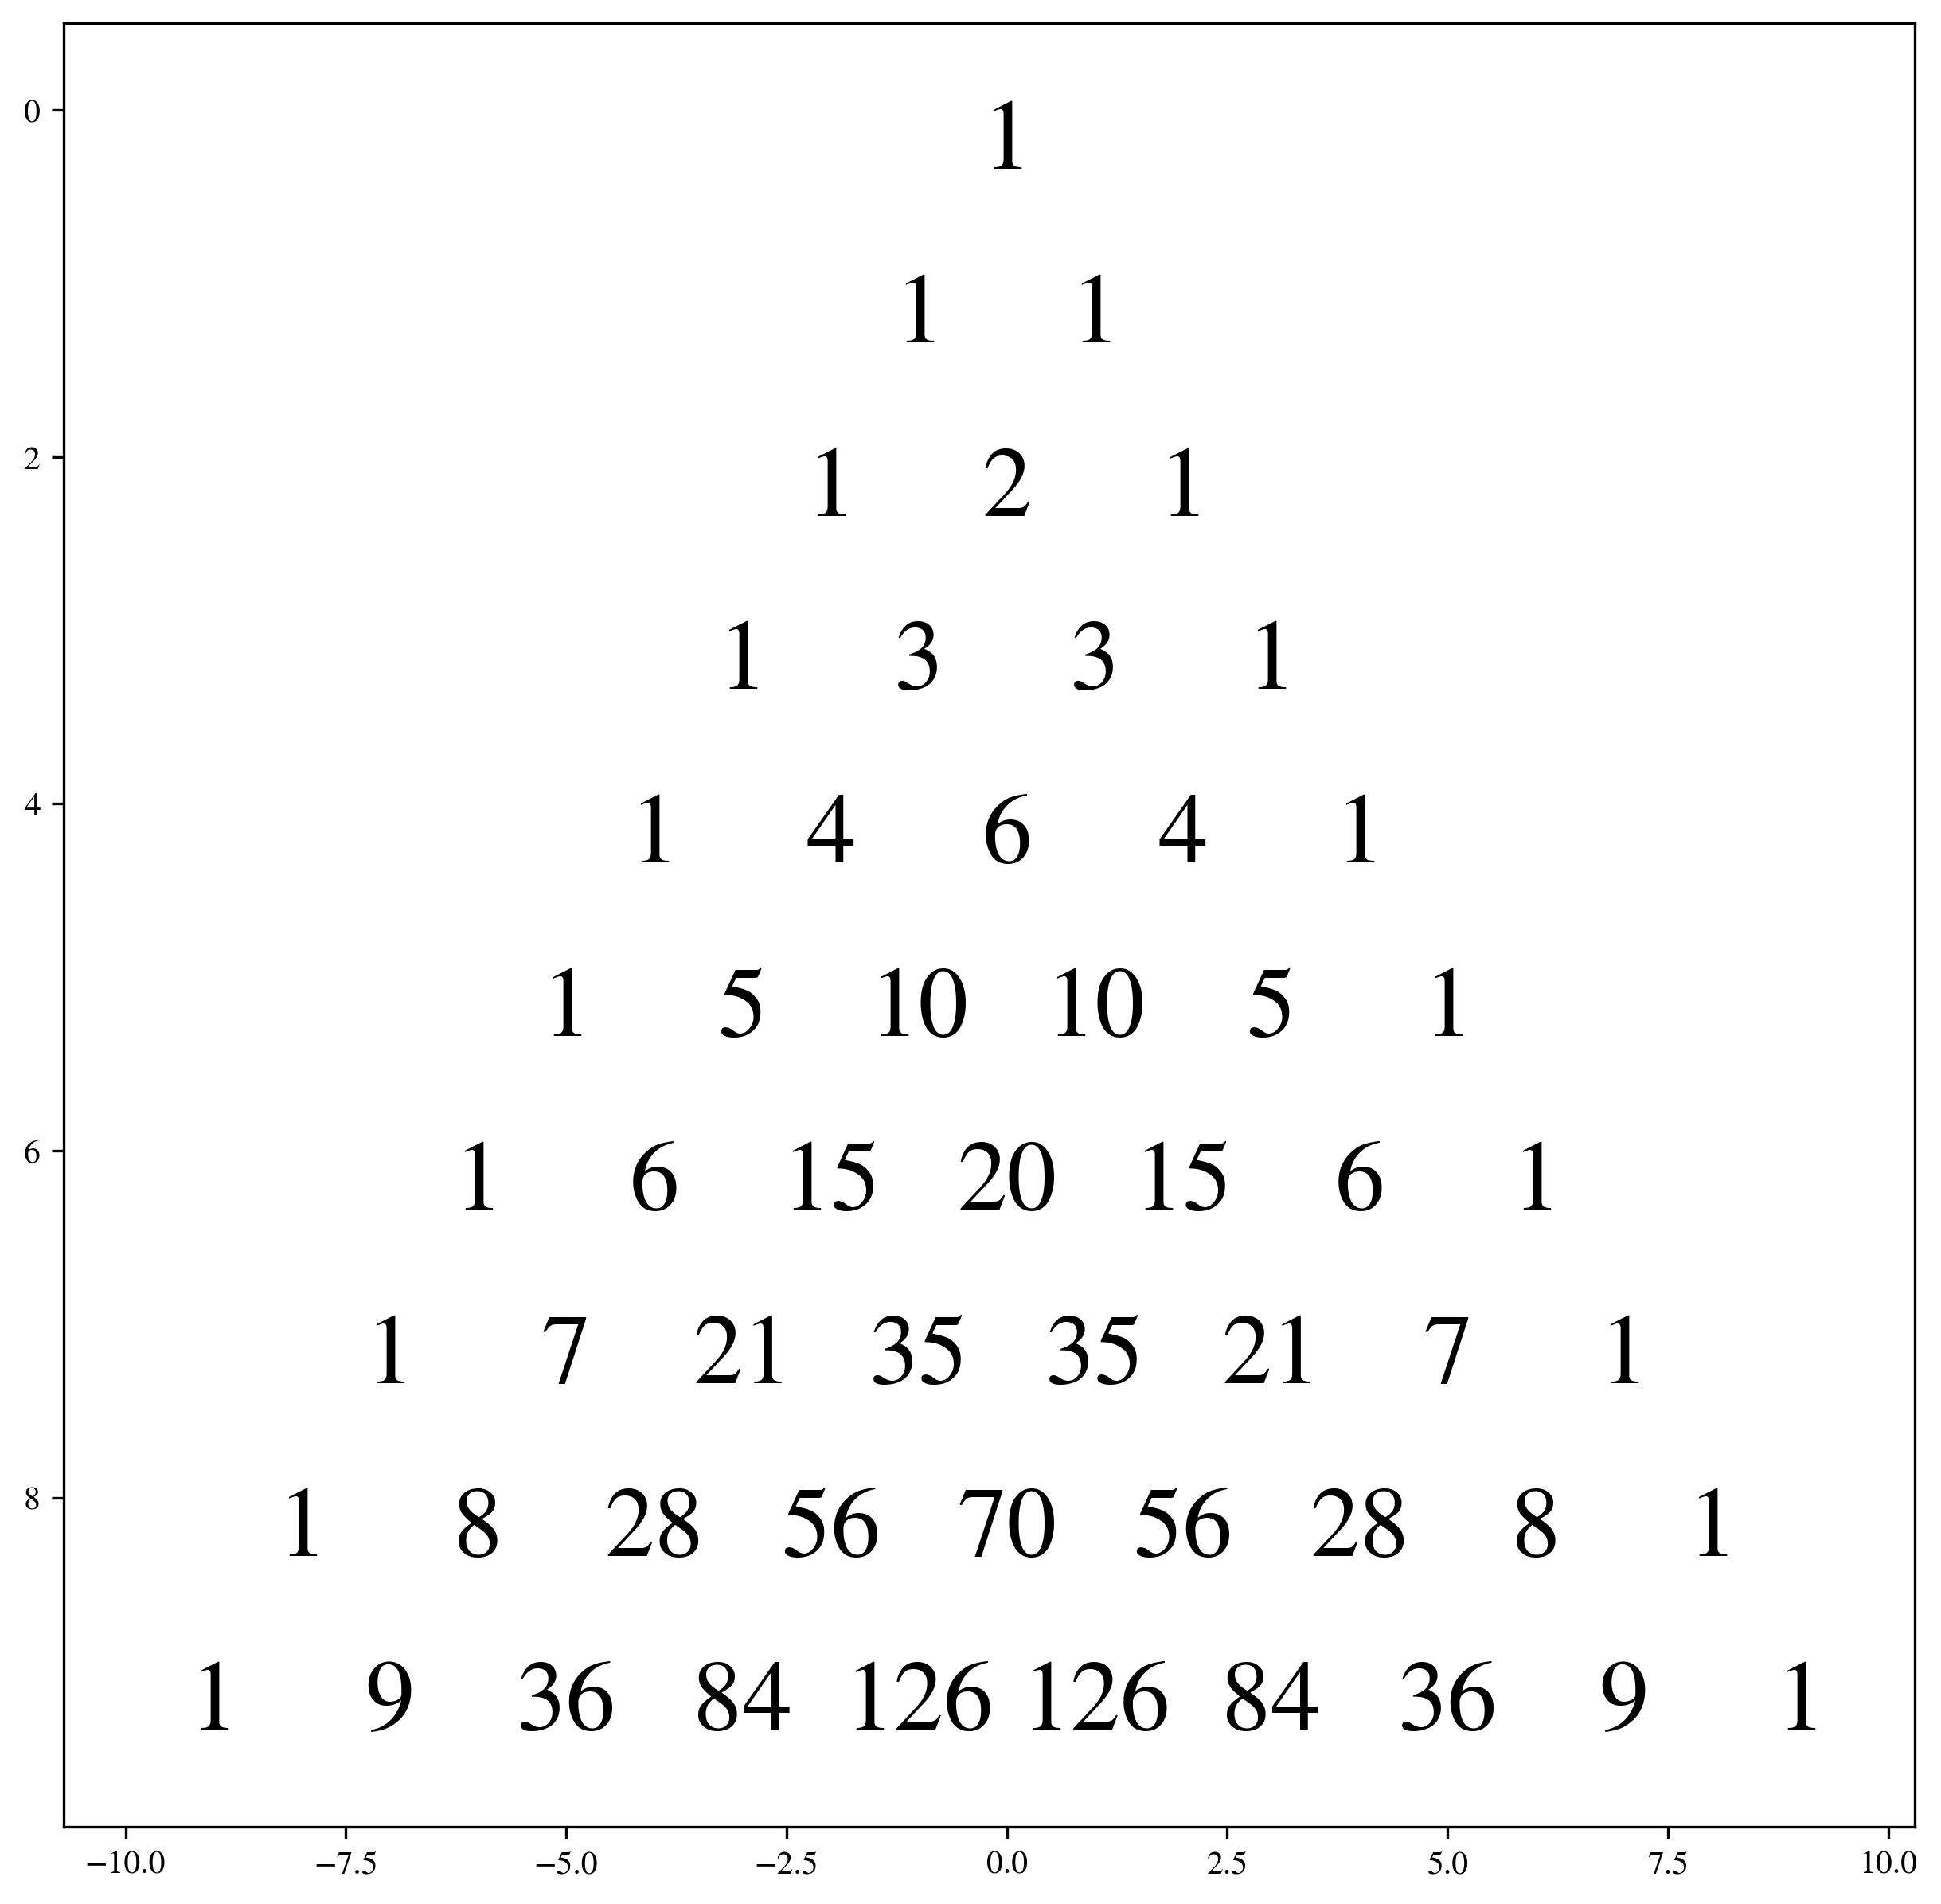

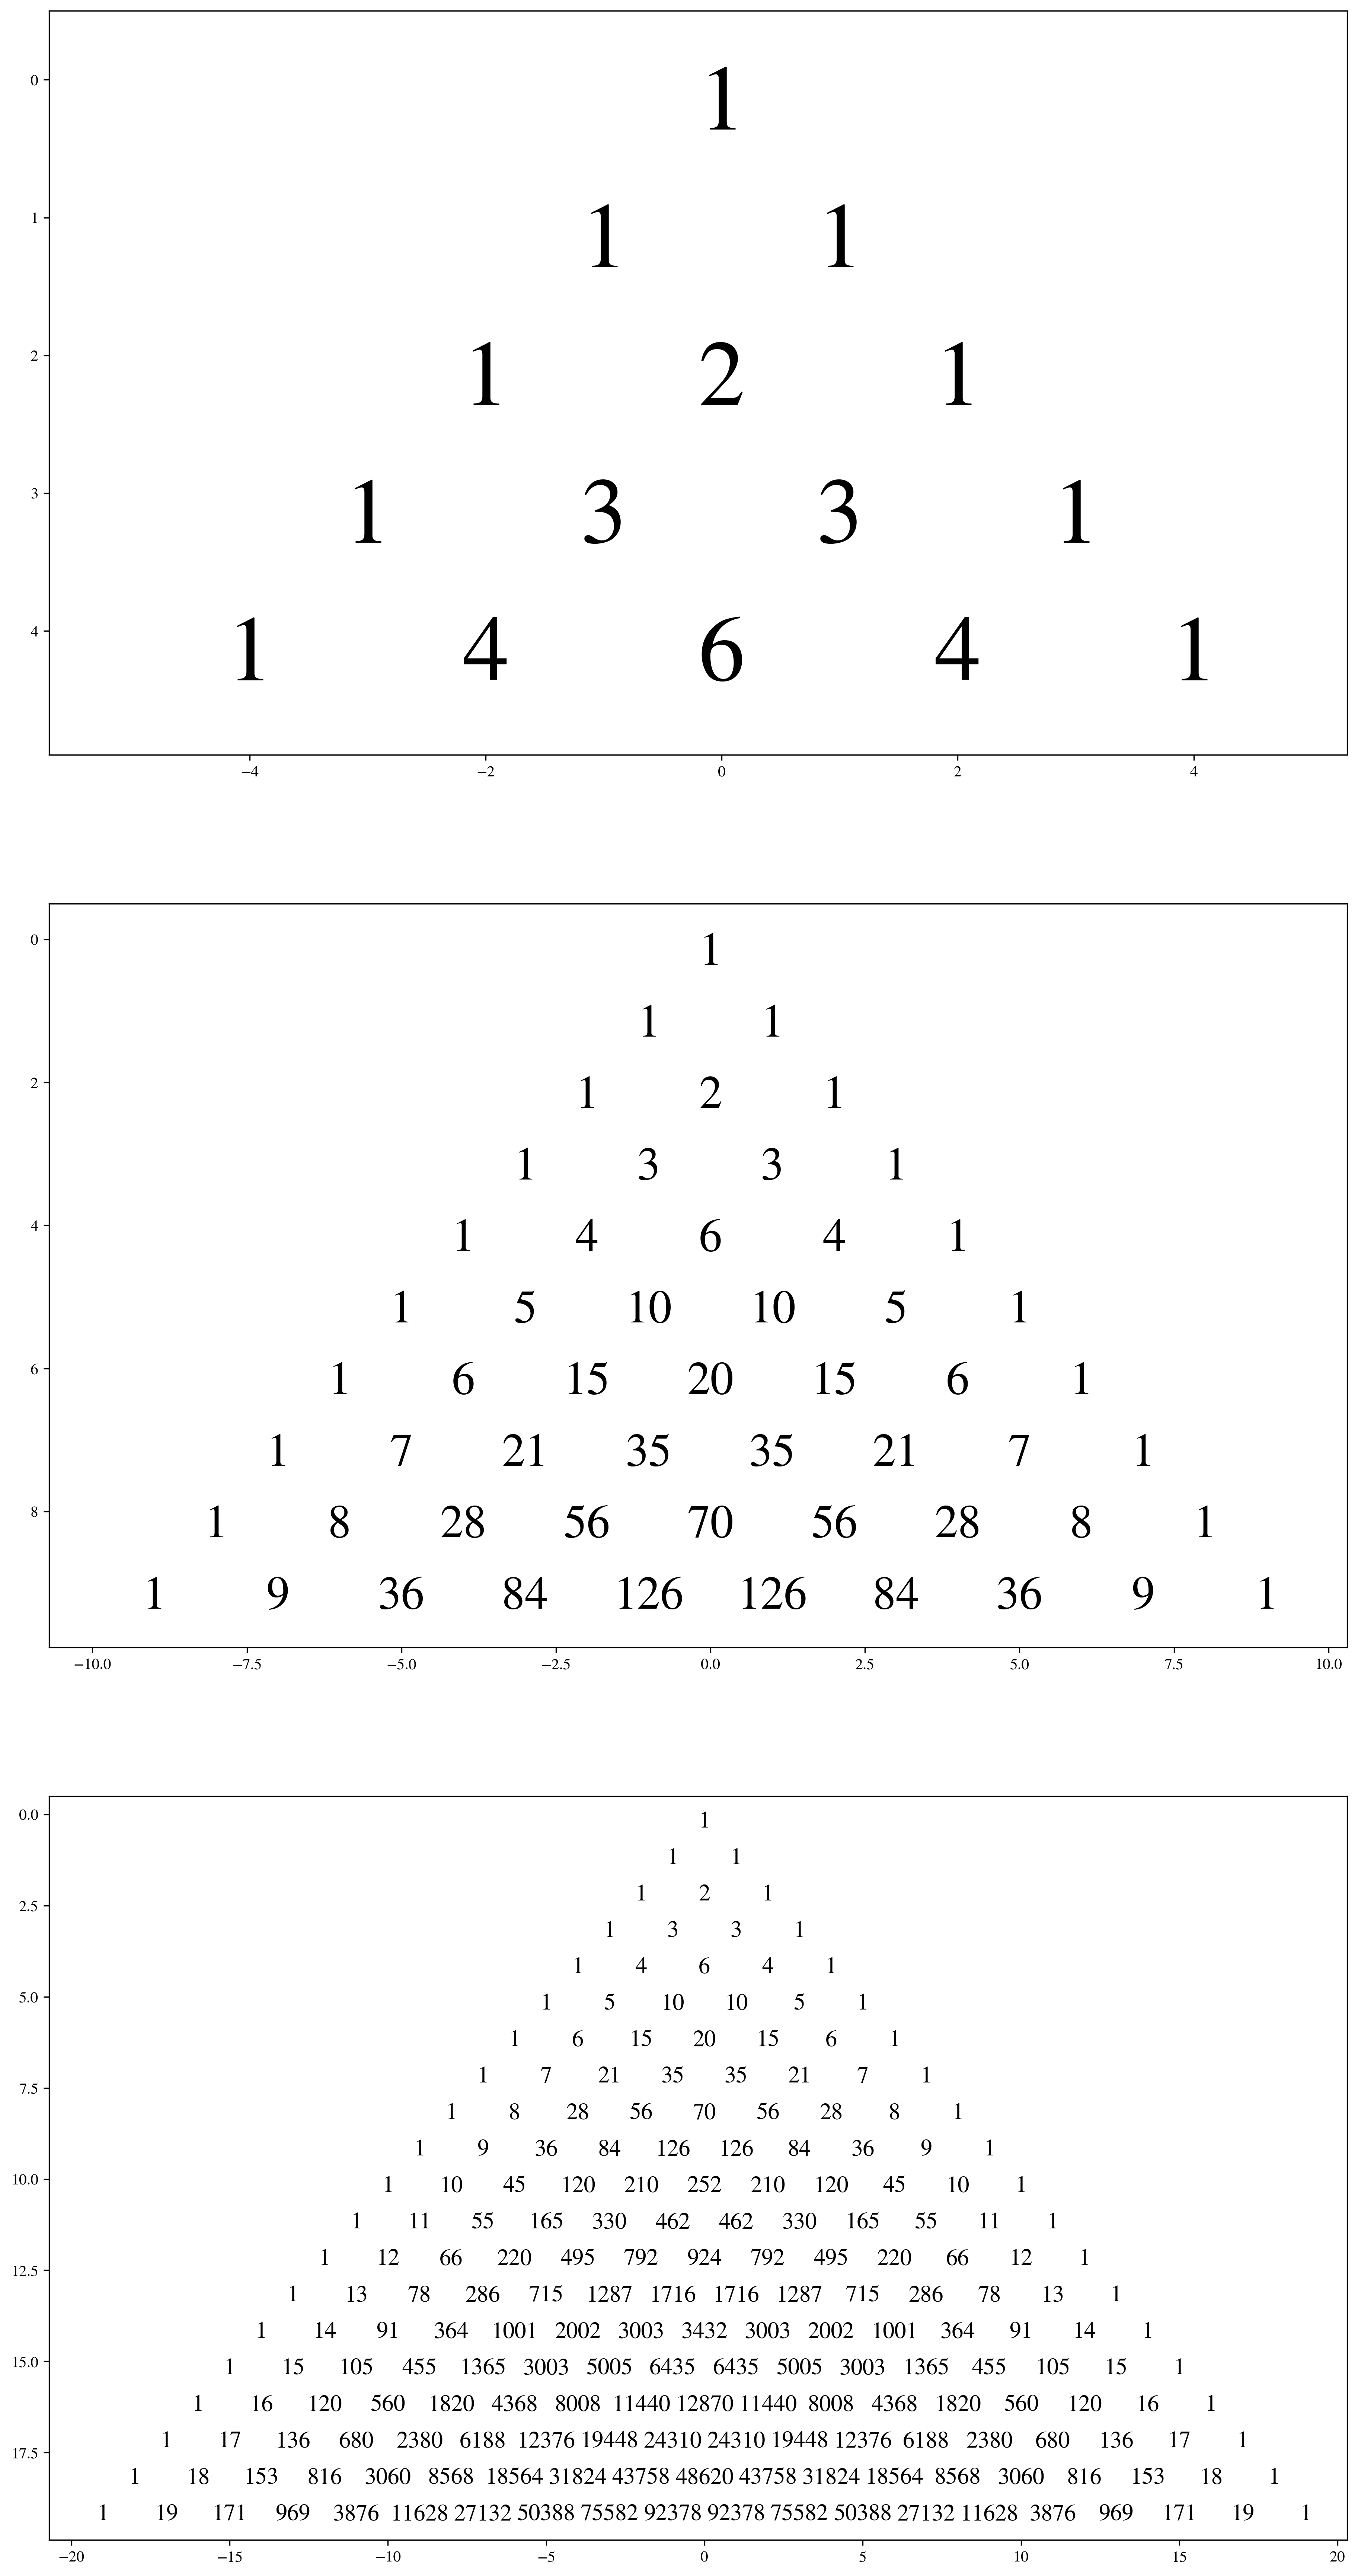

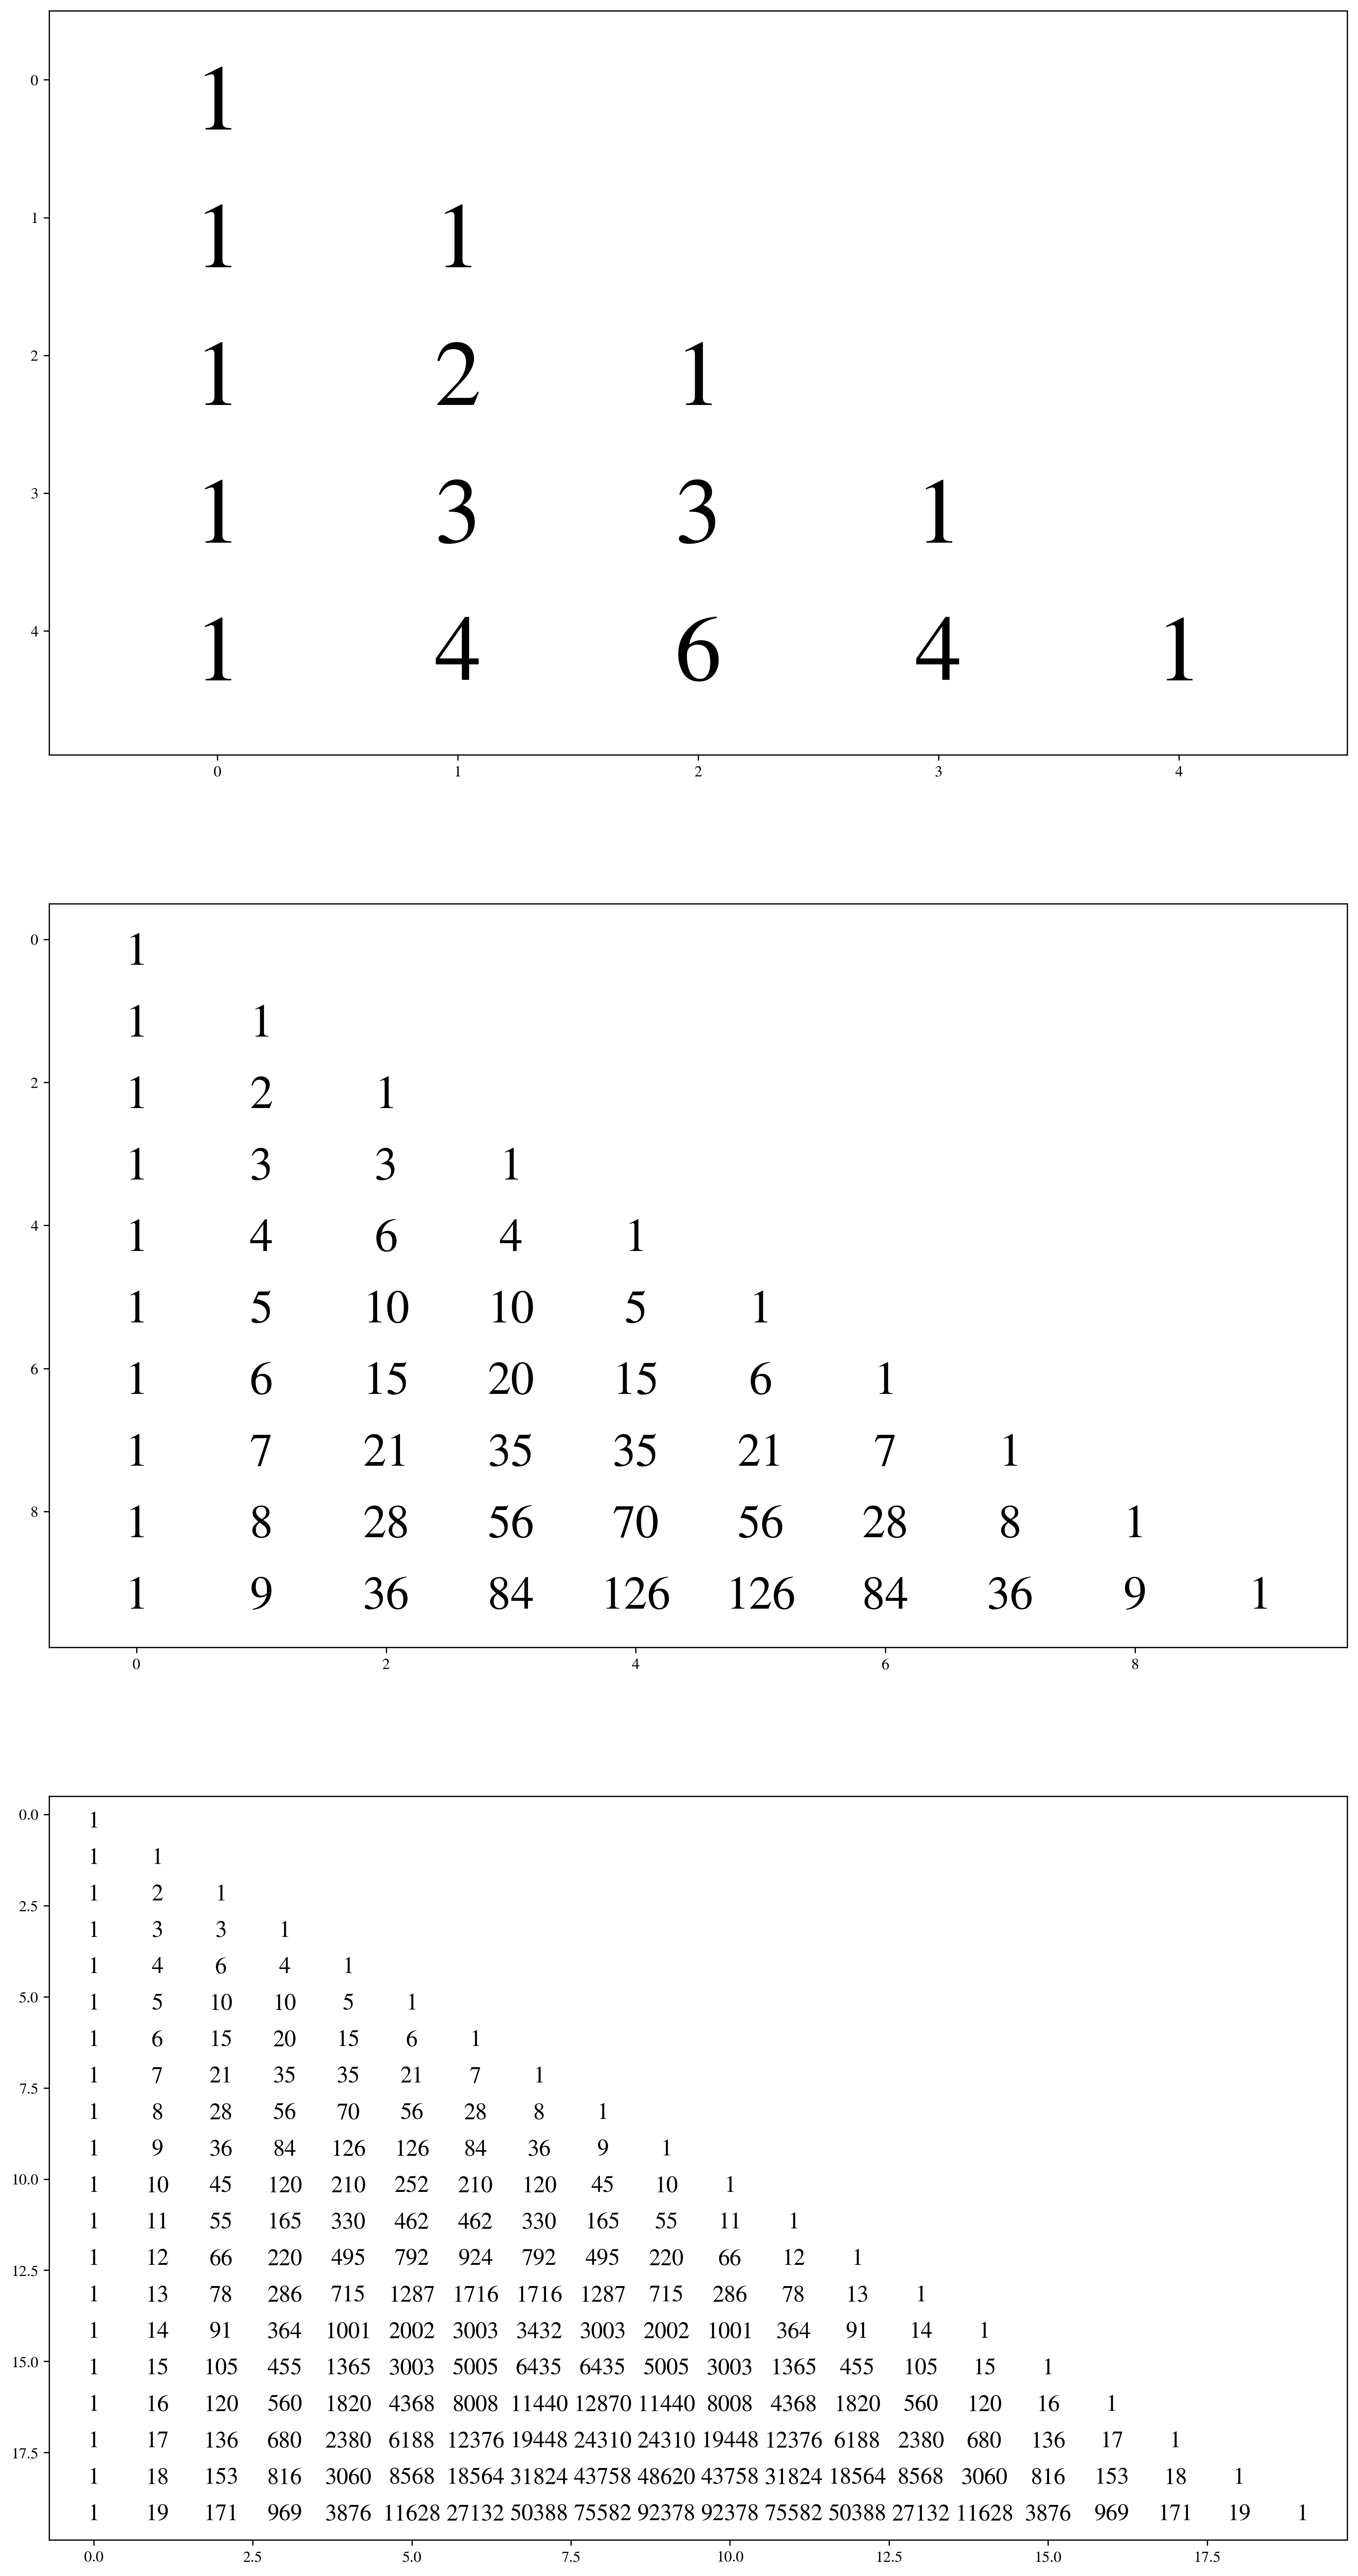

In [14]:
class TriMatrix:
    
    def __init__(self, n:int, init=0, f=None):
        self.n = n    #number of rows (= cols)
        self.length = n*(n+1)//2   #total number of elements
        self.init = init
        self.data = [init]*self.length
        if f is not None:
            self.fill(f)
        
    def __getitem__(self, index):
        if isinstance(index, list) or isinstance(index, tuple):
            i, j = index
            if i >= j and j >= 0 and i<self.n:
                return self.data[i*(i+1)//2 + j]
            else:
                raise IndexError('index out of range')
        else:
            return self.data[index]
        
    def __setitem__(self, index, value):
        if isinstance(index, list) or isinstance(index, tuple):
            i, j = index
            if i >= j and j >= 0 and i<self.n:
                self.data[i*(i+1)//2 + j] = value
            else:
                raise IndexError('index out of range')
        else:
            self.data[index] = value
        
    def __str__(self):
        padsize = len(str(max(self.data)))
        return '\n'.join([' '.join([str(self[i,j]).rjust(padsize) for j in range(i+1)]) for i in range(self.n)]) + '\n'

    to_str = __str__
    
    def latex(self, centered:bool=True):
        s = r'\begin{matrix} '
        for i in range(self.n):
            if centered:
                s += r' ' + r'& '*(self.n-i)
            for j in range(i+1):
                s += str(self[i,j]) + r' & '
                if centered:
                    s += r' & '
            s += r' \\ '
        s += '\end{matrix}'
        return s

    def plot(self, ax=None, centered:bool=True, invert_yaxis:bool=True, set_limits:bool=True, fontsize=None, equalize=False):
        if fontsize is None:
            fontsize = 300//self.n
        for i in range(self.n):
            for j in range(i+1):
                if centered:
                    x, y = 2*j-i, i+0.2
                else:
                    x, y = j, i+0.2
                ax.text(x, y, str(self[i,j]), ha='center', va='center', size=fontsize )
        if set_limits:
            if centered:
                ax.set_xlim(-self.n-0.7, self.n+0.3)
            else:
                ax.set_xlim(-0.7, self.n-0.3)
            ax.set_ylim(-0.5, self.n-0.1)
        if invert_yaxis:
            ax.invert_yaxis()
        if equalize:
            ax.set_aspect('equal')
            
    
    def __repr__(self):
        return f"Triangular Matrix of rank {str(self.n)}"
    
    def reset(self):
        """ Reset the matrix data """
        self.fill(self.init)
        
    def fill(self, f):
        if callable(f):
            for i in range(self.n):
                for j in range(i+1):
                    self[i,j] = f(i,j)
        elif isinstance(f, list) or isinstance(f, tuple):
            for i in range(self.n):
                for j in range(i+1):
                    self[i,j] = f[i,j]
        else:
            for i in range(self.n):
                for j in range(i+1):
                    self[i,j] = f
            
    def __eq__(self, other):
        """ Test equality """
        return (self.data == other.data)
        
    def __add__(self, other=None, shift=0):
        """ Add a matrix to this matrix and
        return the new matrix. Doesn't modify
        the current matrix """
        pass

    def __sub__(self, other=None, shift=0):
        """ Subtract a matrix from this matrix and
        return the new matrix. Doesn't modify
        the current matrix """
        pass
                          
    def __mul__(self, other=None, shift=0):
        """ Multiple a matrix with this matrix and
        return the new matrix. Doesn't modify
        the current matrix """
        pass
        
from math import comb

tm = TriMatrix(10, f=comb)
print(tm)
display(Latex(tm.latex()))
display(Latex(tm.latex(centered=False)))

fig, ax = plt.subplots(1, figsize=(10,10))
tm.plot(ax)

tm.fill(3)
tm[3,1] = 67
print(tm)

tm.fill('x')
print(tm)

m_arr = [5, 10, 20]

fig, ax = plt.subplots(3, figsize=(15,30))
for i, m in enumerate(m_arr):
    tm = TriMatrix(m, f=comb)
    tm.plot(ax[i])

fig, ax = plt.subplots(3, figsize=(15,30))
for i, m in enumerate(m_arr):
    tm = TriMatrix(m, f=comb)
    tm.plot(ax[i], centered=False)

    
plt.show()


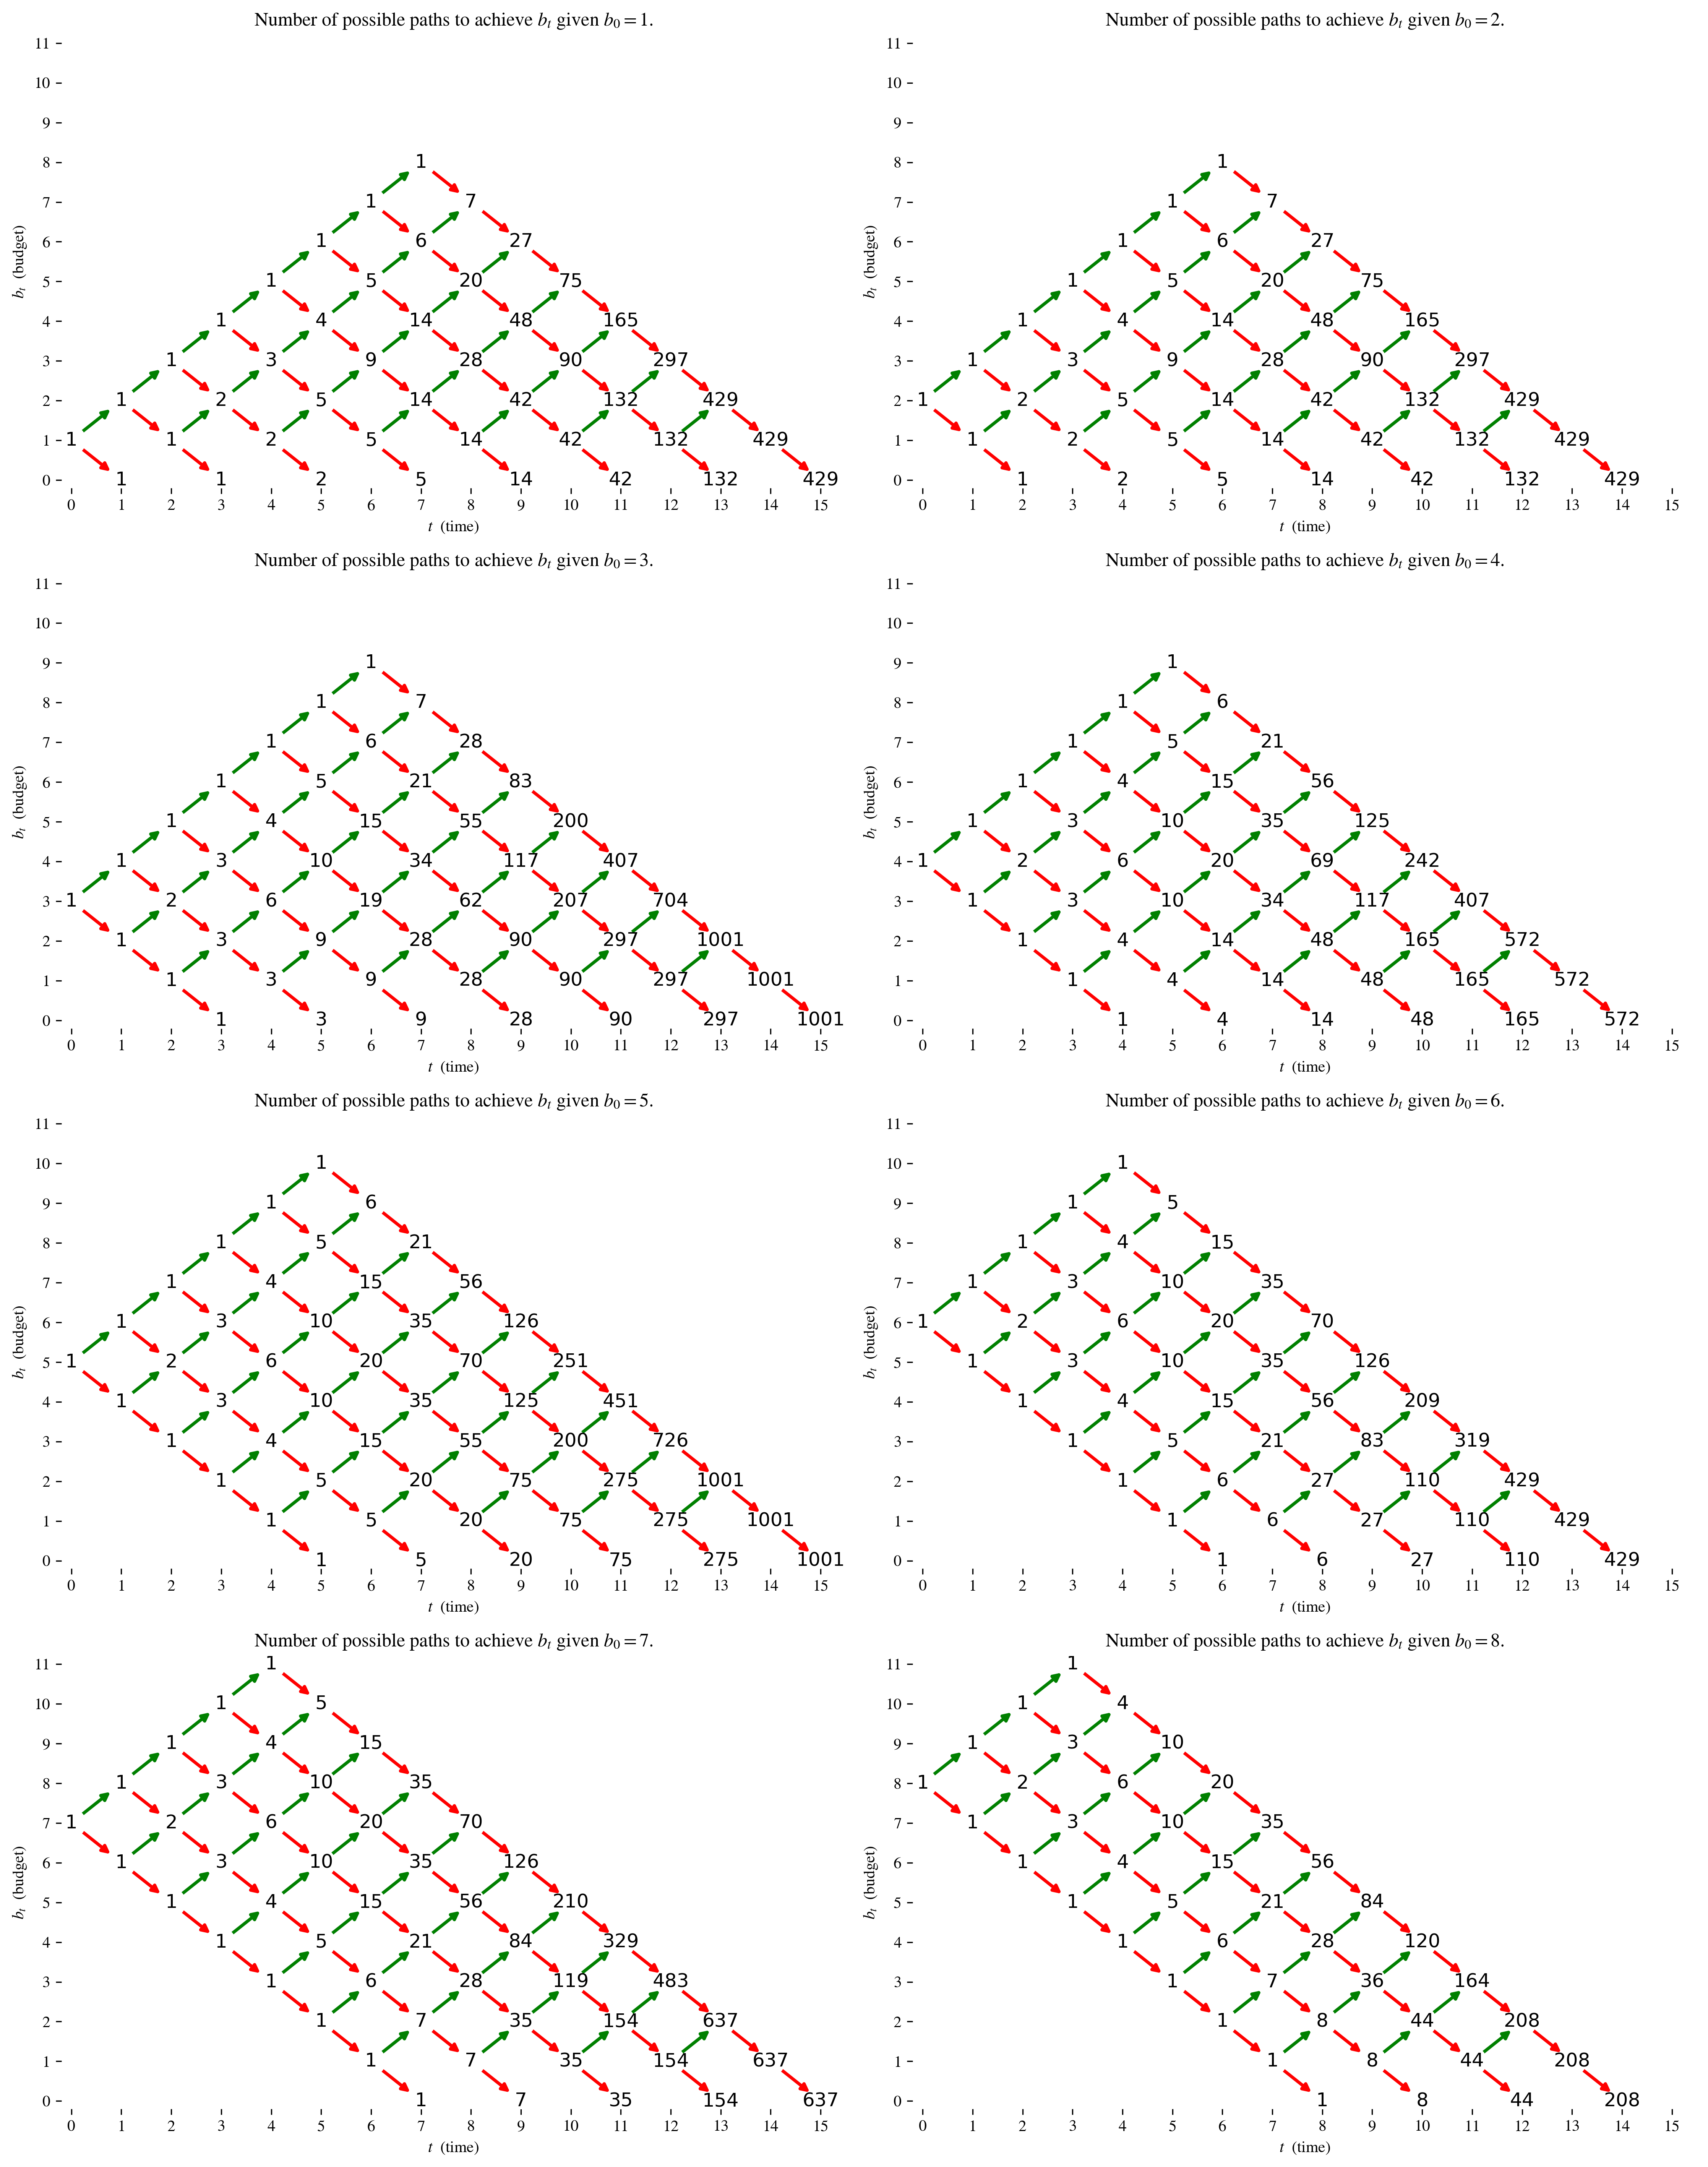

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

t_max = 15
b_0_max = 8
b_max_max = (b_0_max + t_max) // 2

fig, ax = plt.subplots(b_0_max//2, 2, figsize=(15,19))

for k, b_0 in enumerate(range(1, b_0_max+1)):

    k_y = k%2
    k_x = k//2

    b_max = (b_0 + t_max) // 2

    up_steps = b_max - b_0
    dw_steps = t_max - up_steps

    G = nx.DiGraph()

    pos={}
    labels={}

    for i in range(0, up_steps+1):
        for j in range(0, dw_steps+1):
            t = j + i
            b = b_0 + i - j
            if (b >= 0):
                G.add_node(f'({t},{b})', pos=(t,b))
                pos[f'({t},{b})'] = (t,b)
            if (i > 0) and (b > 1):
                G.add_edge(f'({t-1},{b-1})', f'({t},{b})', color='g', weight=2, style='solid')
            if (j > 0) and (b >= 0):
                G.add_edge(f'({t-1},{b+1})', f'({t},{b})', color='r', weight=2, style='dotted')

    node = f'({0},{b_0})'
    G.nodes[node]['value'] = 1
    labels[node] = 1

    for t in range(1, t_max+1):
        for b in range(0, b_max+1):
            node = f'({t},{b})'
            if node in G:
                s = 0
                for pred in G.predecessors(node):
                    s += G.nodes[pred]['value']
                    G.nodes[node]['value'] = s
                    labels[node] = str(s)

    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    styles = [G[u][v]['style'] for u,v in edges]

    nx.draw_networkx_nodes(G, pos, labels, node_color='w', ax=ax[k_x][k_y])
    nx.draw_networkx_edges(G, pos, edge_color=colors, width=weights, ax=ax[k_x][k_y])
    nx.draw_networkx_labels(G, pos, labels, ax=ax[k_x][k_y]) #font_size=16

    ax[k_x][k_y].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    ax[k_x][k_y].set_xticks(range(0, t_max+1))
    ax[k_x][k_y].set_yticks(range(0, b_max_max+1))

    ax[k_x][k_y].set_xlim(-0.2, t_max+0.5)
    ax[k_x][k_y].set_ylim(-0.2, b_max_max+0.2)

    ax[k_x][k_y].spines['top'].set_visible(False)
    ax[k_x][k_y].spines['right'].set_visible(False)
    ax[k_x][k_y].spines['bottom'].set_visible(False)
    ax[k_x][k_y].spines['left'].set_visible(False)

    ax[k_x][k_y].grid(which='both')
    ax[k_x][k_y].grid(which='minor', alpha=0.2)
    ax[k_x][k_y].grid(which='major', alpha=0.7)

    ax[k_x][k_y].set_xlabel('$t$  (time)')
    ax[k_x][k_y].set_ylabel('$b_t$  (budget)')
    ax[k_x][k_y].set_title(f'Number of possible paths to achieve $b_t$ given $b_0 = {b_0}$.')

#fig.suptitle('Number of possible paths from a given initial budget to achieve another budget level.')
fig.tight_layout()

#plt.savefig('combinations.pdf', bbox_inches='tight')
#files.download('combinations.pdf')

plt.show()



KeyError: 'value'

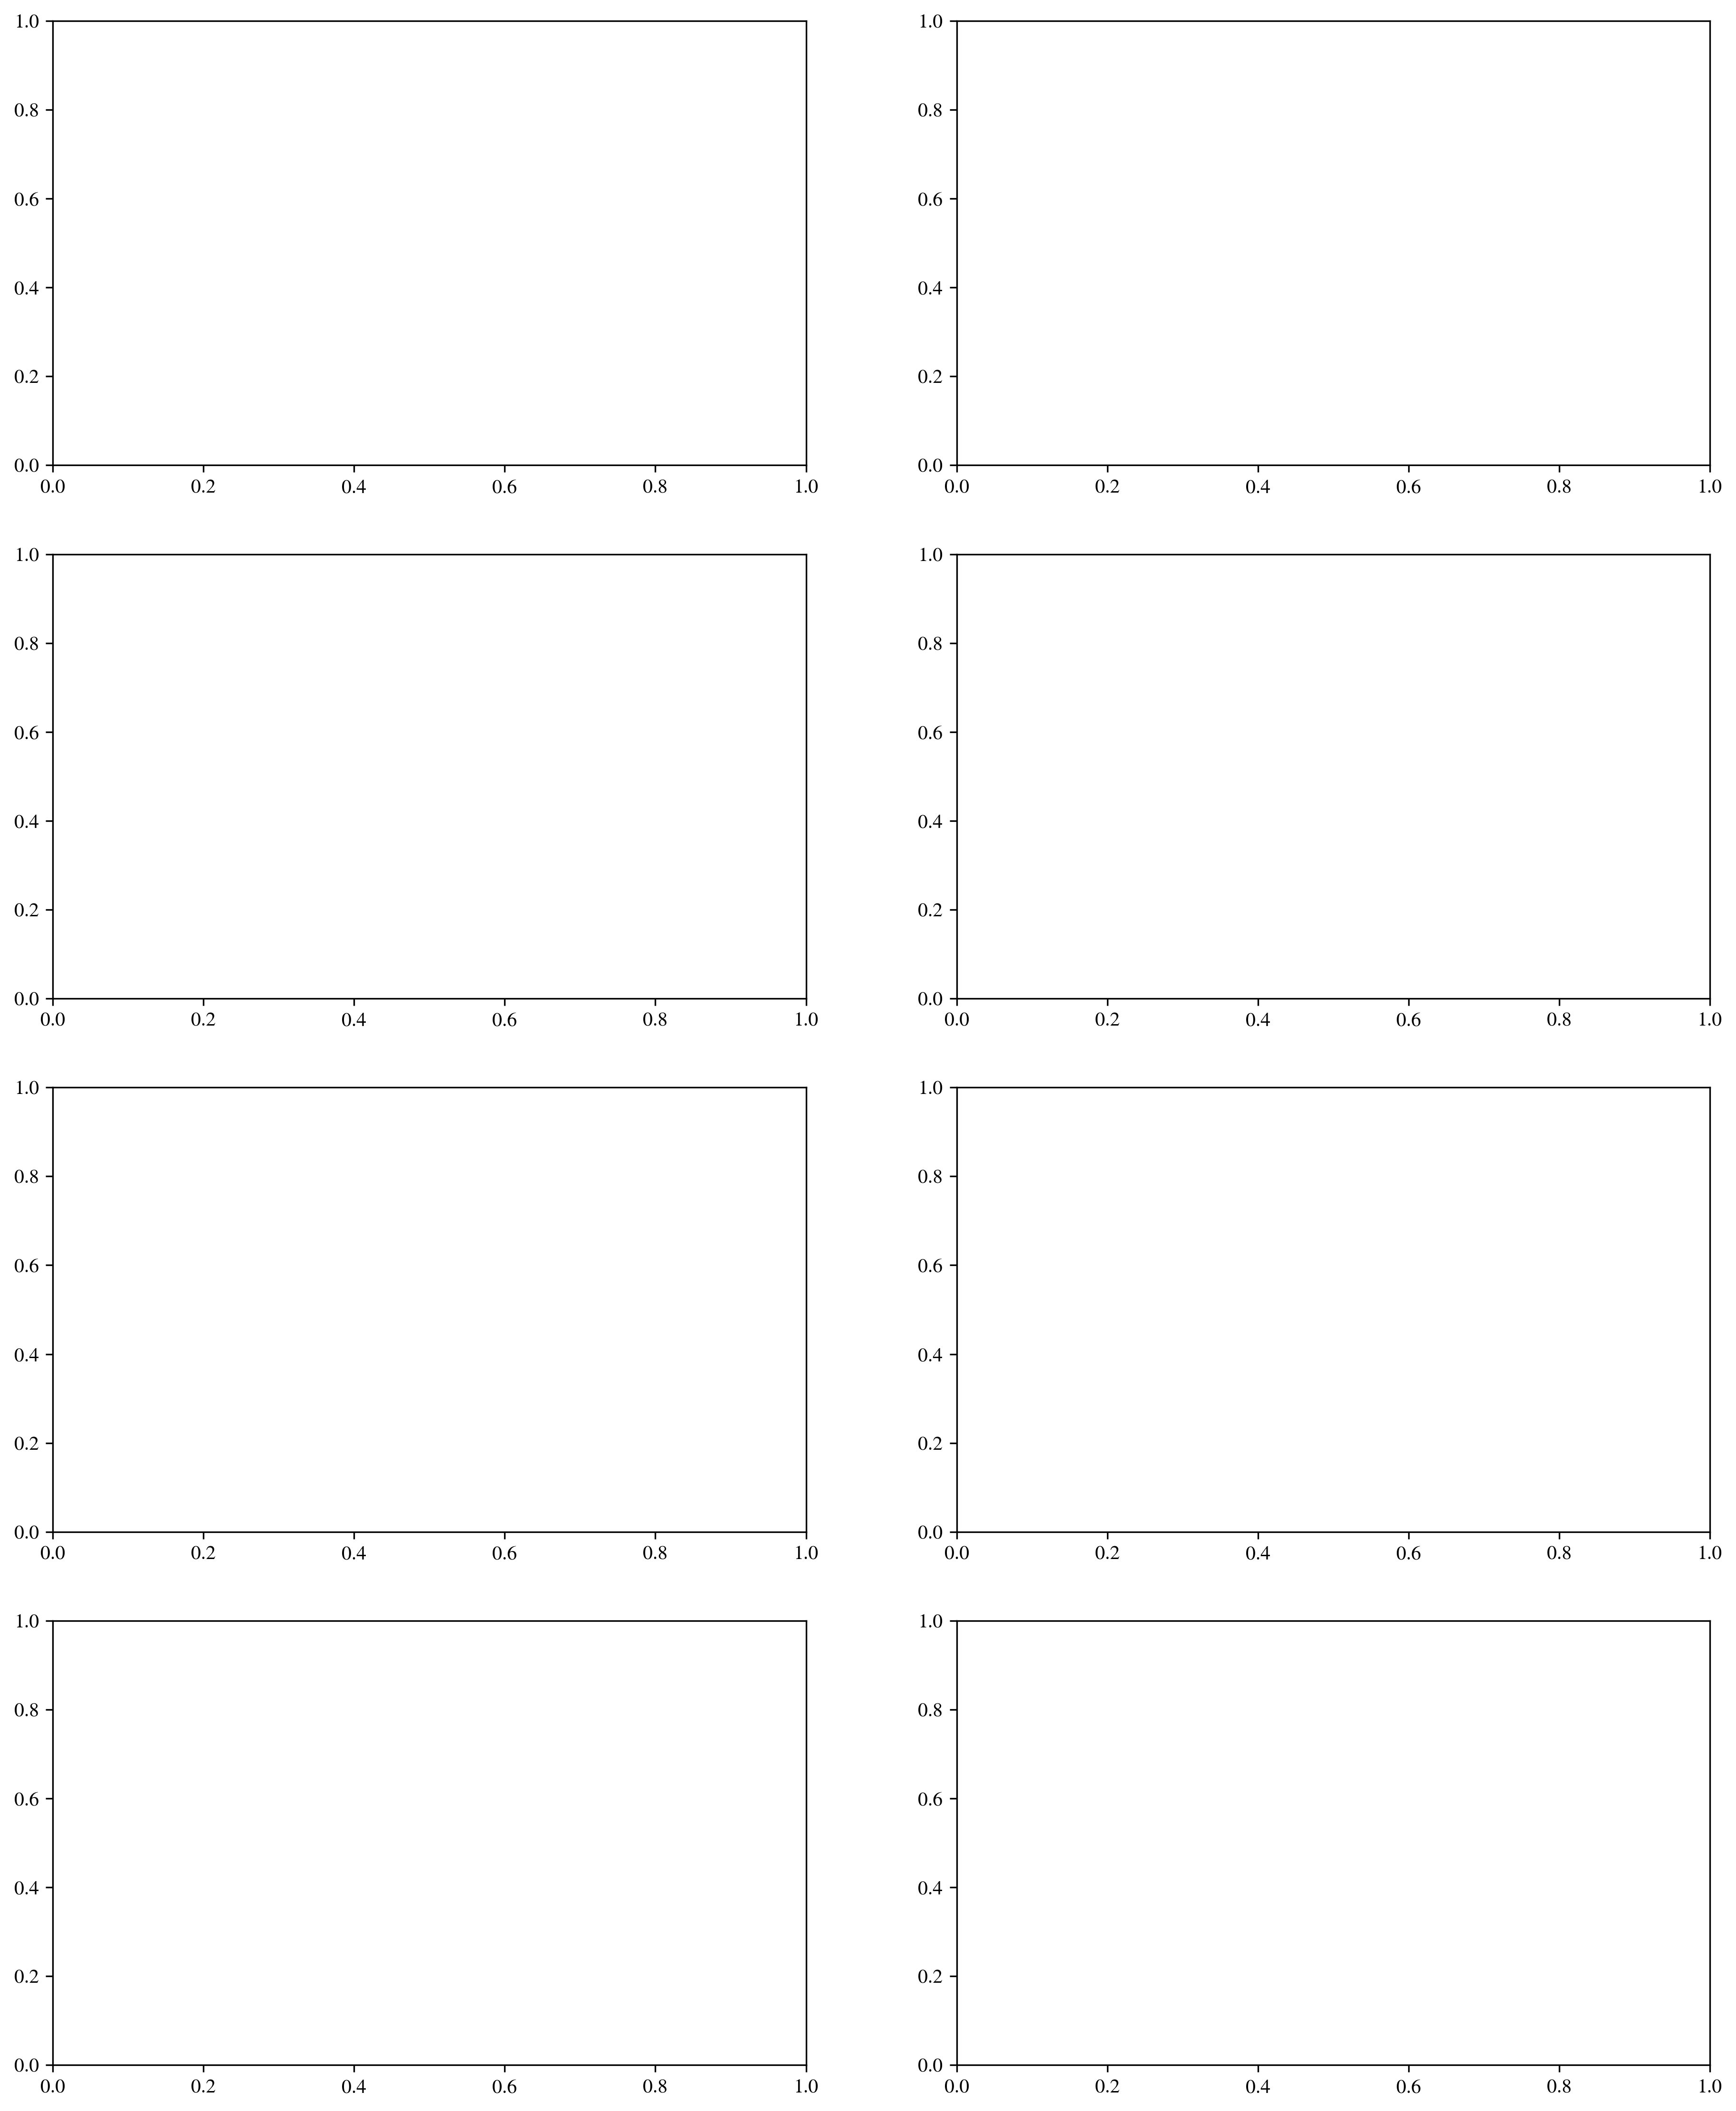

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

t_max = 15
b_0_max = 8
b_max_max = (b_0_max + t_max) // 2

fig, ax = plt.subplots(b_0_max//2, 2, figsize=(15,19))

for k, b_0 in enumerate(range(1, b_0_max+1)):

    k_y = k%2
    k_x = k//2

    b_max = (b_0 + t_max) // 2

    up_steps = b_max - b_0
    dw_steps = t_max - up_steps

    G = nx.DiGraph()

    pos={}
    labels={}

    for i in range(0, up_steps+1):
        for j in range(0, dw_steps+1):
            t = j + i
            b = b_0 + i - j
            if (b >= 0):
                G.add_node(f'({t},{b})', pos=(t,b))
                pos[f'({t},{b})'] = (t,b)
            if (i > 0) and (b > 1):
                G.add_edge(f'({t-1},{b-1})', f'({t},{b})', color='g', weight=2, style='solid')
            if (j > 0) and (b >= 0):
                G.add_edge(f'({t-1},{b+1})', f'({t},{b})', color='r', weight=2, style='dotted')

    node = f'({0},{b_0})'
    G.nodes[node]['value'] = 1
    labels[node] = 1

    for t in range(1, t_max+1):
        for b in range(0, b_max+1):
            node = f'({t},{b})'
            if node in G:
                s = 0
                for pred in G.predecessors(node):
                    s += G.nodes[pred]['value']
                    G.nodes[node]['catalan_value'] = s
                    labels[node] = str(s)

    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    styles = [G[u][v]['style'] for u,v in edges]

    nx.draw_networkx_nodes(G, pos, labels, node_color='w', ax=ax[k_x][k_y])
    nx.draw_networkx_edges(G, pos, edge_color=colors, width=weights, ax=ax[k_x][k_y])
    nx.draw_networkx_labels(G, pos, labels, ax=ax[k_x][k_y]) #font_size=16

    ax[k_x][k_y].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    ax[k_x][k_y].set_xticks(range(0, t_max+1))
    ax[k_x][k_y].set_yticks(range(0, b_max_max+1))

    ax[k_x][k_y].set_xlim(-0.2, t_max+0.5)
    ax[k_x][k_y].set_ylim(-0.2, b_max_max+0.2)

    ax[k_x][k_y].spines['top'].set_visible(False)
    ax[k_x][k_y].spines['right'].set_visible(False)
    ax[k_x][k_y].spines['bottom'].set_visible(False)
    ax[k_x][k_y].spines['left'].set_visible(False)

    ax[k_x][k_y].grid(which='both')
    ax[k_x][k_y].grid(which='minor', alpha=0.2)
    ax[k_x][k_y].grid(which='major', alpha=0.7)

    ax[k_x][k_y].set_xlabel('$t$  (time)')
    ax[k_x][k_y].set_ylabel('$b_t$  (budget)')
    ax[k_x][k_y].set_title(f'Number of possible paths to achieve $b_t$ given $b_0 = {b_0}$.')

#fig.suptitle('Number of possible paths from a given initial budget to achieve another budget level.')
fig.tight_layout()

#plt.savefig('combinations.pdf', bbox_inches='tight')
#files.download('combinations.pdf')

plt.show()



                                       1   
                                    1     1   
                                 1     2     1   
                              1     3     3     1   
                           1     4     6     4     1   
                        1     5    10    10     5     1   
                     1     6    15    20    15     6     1   
                  1     7    21    35    35    21     7     1   
               1     8    28    56    70    56    28     8     1   
            1     9    36    84   126   126    84    36     9     1   
         1    10    45   120   210   252   210   120    45    10     1   
      1    11    55   165   330   462   462   330   165    55    11     1   
   1    12    66   220   495   792   924   792   495   220    66    12     1   
<class 'networkx.classes.digraph.DiGraph'>


<ipython-input-17-3f4571a08f62>:89: DeprecationWarning: nx.nx_pydot.pydot_layout depends on the pydot package, which hasknown issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.drawing.nx_pydot.pydot_layout(self.G, prog='dot')


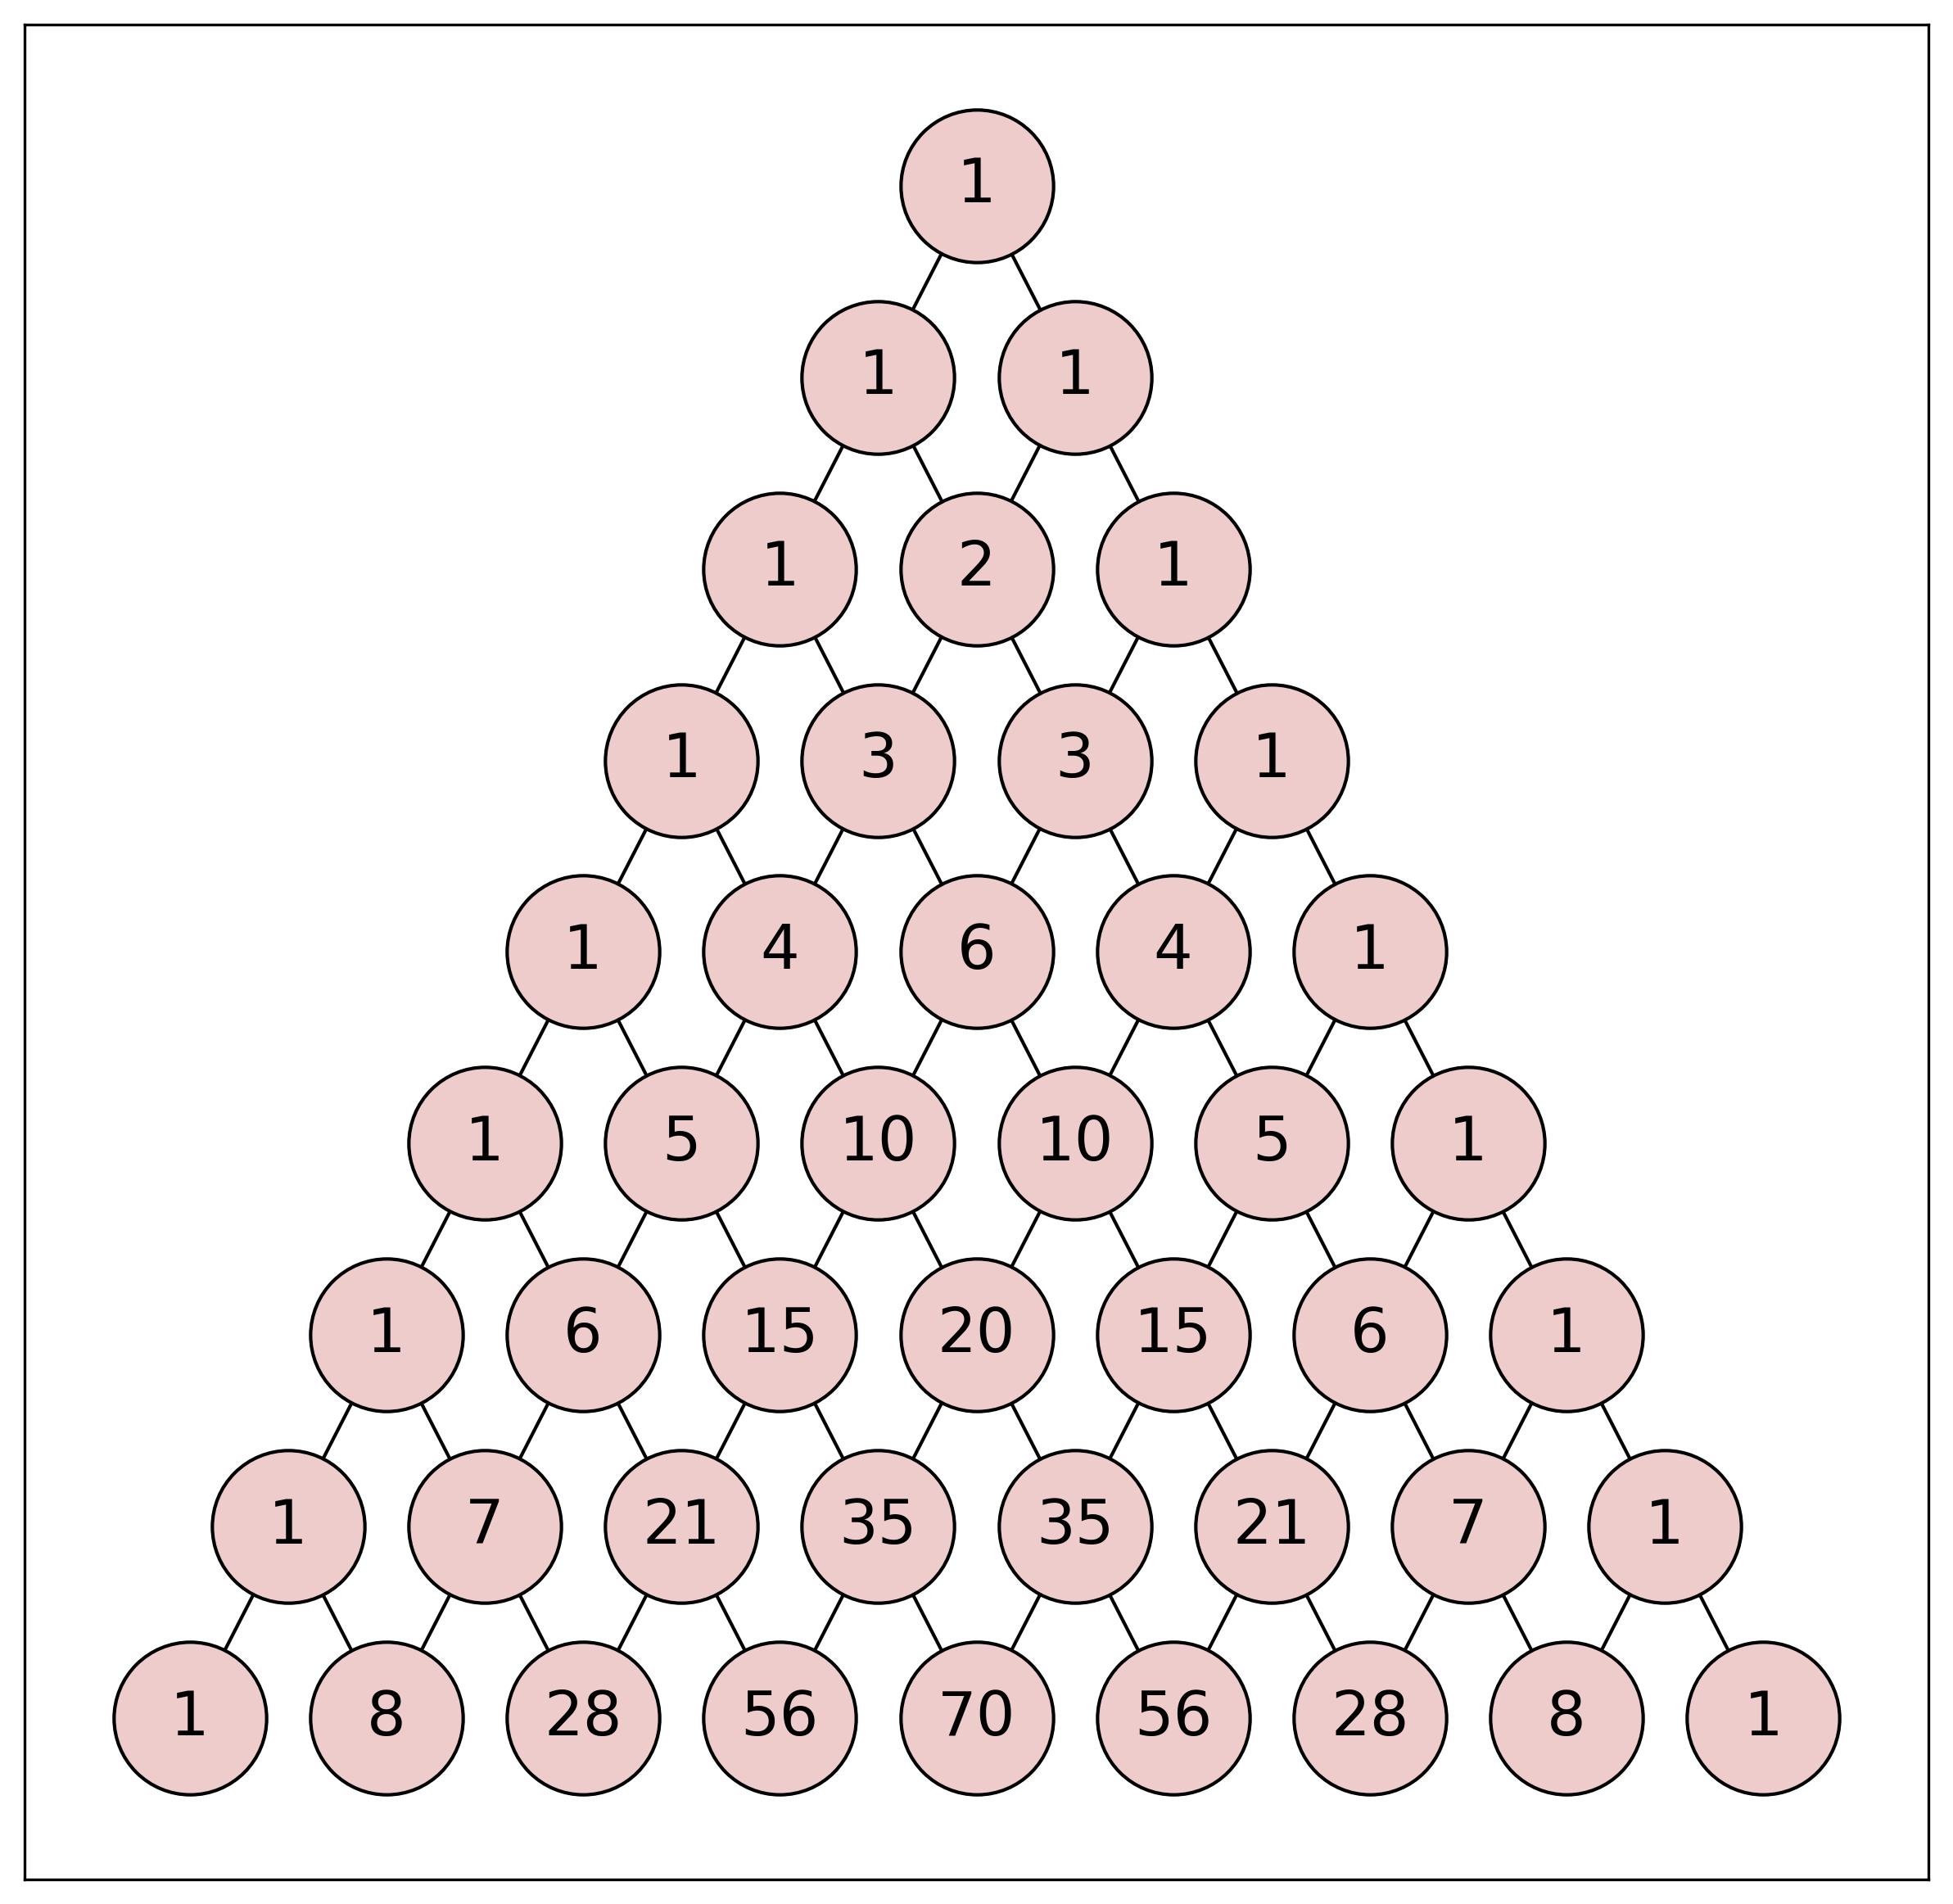

In [17]:
# simple Pascal's triangle realisation
# populated with Pascal's triangle rows give an infinite sequence of finite sequences
# this implementation support few printing styles

import math

class PascalsTriangle():

    def __init__(self, rowcount):
        self.rowcount = rowcount
        self.pt = self._create()

    def _create(self):
        """Create an empty list and then append lists of 0s, each list one longer than the previous"""
        return [[0] * r for r in range(1, self.rowcount + 1)]

    def populate(self):
        """Populate an uninitialized list with actual values"""
        for r in range(0, len(self.pt)):
            for c in range(0, len(self.pt[r])):
                self.pt[r][c] = math.factorial(r) / (math.factorial(c) * math.factorial(r - c))

    def print_left(self):
        """Prints the triangle in a left-aligned format to demonstrate data structure"""
        for r in range(0, len(self.pt)):
            for c in range(0, len(self.pt[r])):
                print('{:>4}'.format(int(self.pt[r][c])), end="")
            print()

    def print_centre(self):
        """Prints the triangle in a conventional centred format"""
        inset = int(((((len(self.pt) * 2) - 1) / 2) * 3))
        for r in range(0, len(self.pt)):
            print(" " * inset, end="")
            for c in range(0, len(self.pt[r])):
                print('{:>3}   '.format(int(self.pt[r][c])), end="")
            print()
            inset -= 3

            
triangle = PascalsTriangle(13)
triangle.populate()
triangle.print_centre()


# networkx Pascal's triangle realisation
# populated with Pascal's triangle rows give an infinite sequence of finite sequences
# fillin graph objects from populated triangle
# include plotting method with colorisation support 


import networkx as nx
import matplotlib.pyplot as plt


class GraphTriangle(PascalsTriangle):
    
    def __init__(self, rowcount):
        super(GraphTriangle, self).__init__(rowcount)
        self.populate()
        self.G = nx.DiGraph()
        self._create_root_node()
        self._fill_graph()
        
    def _create_root_node(self):
        self.G.add_node(f"{0}_{0}", weight=1)
        
    def _fill_graph(self):
        """Fill graph enumerating throw previously generated list respecting to weight attribute"""
        for y, l in enumerate(self.pt[1:]):
            row_len = len(l)
            for x, w in enumerate(l):
                self.G.add_node(f"{y+1}_{x}", weight=w)
                if x == 0:
                    self.G.add_edge(f"{y}_{x}",   f"{y+1}_{x}")
                elif x == row_len-1:
                    self.G.add_edge(f"{y}_{x-1}", f"{y+1}_{x}")
                else:
                    self.G.add_edge(f"{y}_{x}",   f"{y+1}_{x}")
                    self.G.add_edge(f"{y}_{x-1}", f"{y+1}_{x}")
    
    def plot_digraph(self, color_node=False):
        """PLot graph with pydot, set fig_size and draw nodes, edges and labels"""
        labels = {n:int(w['weight']) for n, w in self.G.nodes(data=True)}
        
        node_colors='#eecccc'
        if color_node:
            node_colors = [w for r in digraph.pt for w in r]
        pos = nx.drawing.nx_pydot.pydot_layout(self.G, prog='dot')
        
        box_size = len(self.pt) + 1
        box_size = 9 if box_size < 9 else box_size
        plt.figure(1,figsize=(box_size,box_size)) 
        
        nx.draw_networkx_nodes(self.G, 
                               pos, 
                               node_size=2000,
                               edgecolors='#000000', linewidths=1, 
                               node_color=node_colors, vmin=min(node_colors), vmax=max(node_colors),
                               cmap='Set3')
        nx.draw_networkx_edges(self.G, pos, edgelist=self.G.edges(), arrows=False, width=1)
        nx.draw_networkx_labels(self.G, pos, labels=labels, font_size=18);
        
        plt.show()

digraph = GraphTriangle(9)
print(type(digraph.G))

digraph.plot_digraph()

